# Предсказание болезни Альцгеймера (БА) по данным из alzheimers_disease_dataset

**Цель проекта** — выявить значимые предикторы и предсказать наличие болезни Альцгеймера (БА), основываясь на социально-медицинских статистических данных.

In [2]:
# импорт функций из гита
import requests
#with open('analysis_functions.py', 'w', encoding='utf-8') as file:
    #file.write(requests.get('https://raw.githubusercontent.com/nadiia90/ABD_TEAM_13/refs/heads/main/analysis_functions.py?token=GHSAT0AAAAAADAFSFIQWB5Z5Z5CMY2HDH4YZ6WUDOA').text)

#with open('show_distribution_correlation.py', 'w', encoding='utf-8') as file:
   #file.write(requests.get('https://raw.githubusercontent.com/nadiia90/ABD_TEAM_13/refs/heads/main/show_distribution_correlation.py?token=GHSAT0AAAAAADAFSFIQYYKVC37JIUBJH5XGZ6WUDBQ').text)

#from analysis_functions import compute_vif_classical, variable_analysis
#from show_distribution_correlation import plot_histograms, plot_distribution_with_hue, binary_distributions, correlation_with_target
from IPython.display import display, Markdown
#import kagglehub
import pandas as pd
import re
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import spearmanr, chi2_contingency
from scipy.stats import ttest_ind

In [3]:
import pandas as pd
import zipfile

zip_file_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-natalija-bondarenk-3925b/ALZ/archive.zip'

with zipfile.ZipFile(zip_file_path, 'r') as z:
    print(z.namelist())
    with z.open('alzheimers_disease_data.csv') as f:
        df = pd.read_csv(f, usecols=lambda column: column not in ['PatientID', 'DoctorInCharge'])


['alzheimers_disease_data.csv']


In [4]:
#from analysis_functions import compute_vif_classical, variable_analysis
#from show_distribution_correlation import plot_histograms, plot_distribution_with_hue, binary_distributions, correlation_with_target
from IPython.display import display, Markdown
#import kagglehub
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import spearmanr, chi2_contingency
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import datetime
from sklearn.preprocessing import StandardScaler

In [5]:
# смотрим размерность
df.shape

(2149, 33)

## Описание данных

Набор данных содержит 2149 строк и 33 столбцов со следующей информацией:

1. **Информация о пациенте:**

- **Демографические данные**:
    - `Age`: варьируется от 60 до 90 лет. *Дискретная, численная*;
    - `Gender`: Пол пациентов, где 0 обозначает мужчину, а 1 - женщину. *Бинарная, категориальная*;
    - `Ethnicity`, *категориальная номинативная переменная*, обозначаемая следующим образом:
       - 0: Европеоид;
       - 1: Афроамериканец
       - 2: Азиат
       - 3: Другие
    - `EducationLevel`, *категориальная порядковая переменная*. Содержит следующие обозначения:
       - 0: Нет
       - 1: Средняя школа
       - 2: Степень бакалавра
       - 3: Высшее
       
- **Факторы образа жизни**:
    - `BMI`: Индекс массы тела пациентов, варьирующийся от 15 до 40. *Непрерывная, численная*;
    - `Smoking`: 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*;
    - `AlcoholConsumption`: еженедельное потребление алкоголя в единицах измерения, варьирующееся от 0 до 20. *Непрерывная, численная*;
    - `PhysicalActivity`: еженедельная физическая активность в часах в диапазоне от 0 до 10. *Непрерывная, численная*;
    - `DietQuality`: оценка качества диеты в диапазоне от 0 до 10. *Непрерывная, численная*;
    - `SleepQuality`: оценка качества сна в диапазоне от 4 до 10. *Непрерывная, численная*.

2. **История болезни**:
    - `FamilyHistoryAlzheimers`: Семейная история болезни Альцгеймера. 0 указывает на отсутствие, а 1 - на "да". *Бинарная, категориальная*;
    - `CardiovascularDisease`: Наличие сердечно-сосудистых заболеваний. 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*;
    - `Diabetes`: Наличие сахарного диабета, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*;
    - `Depression`: Наличие депрессии, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*;
    - `HeadInjury`: Травма головы в анамнезе, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*;
    - `Hypertension`: Наличие артериальной гипертензии, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*.

3. **Клинические показатели**:
    - `SystolicBP`: систолическое артериальное давление в диапазоне от 90 до 180 мм рт.ст. *Дискретная, численная*;
    - `DiastolicBP`: диастолическое артериальное давление в диапазоне от 60 до 120 мм рт. ст. *Дискретная, численная*;
    - `CholesterolTotal`: уровень общего холестерина в крови колеблется от 150 до 300 мг/дл. *Непрерывная, численная*;
    - `CholesterolLDL`: уровень холестерина липопротеидов низкой плотности колеблется от 50 до 200 мг/дл. *Непрерывная, численная*;
    - `CholesterolHDL`: уровень холестерина липопротеидов высокой плотности, варьирующийся от 20 до 100 мг/дл. *Непрерывная, численная*;
    - `CholesterolTriglycerides`: уровень триглицеридов, варьирующийся от 50 до 400 мг/дл. *Непрерывная, численная*.

4. **Оценка когнитивных и функциональных возможностей**:
    - `MMSE`: балл за мини-тестирование психического состояния, варьирующийся от 0 до 30. Более низкие баллы указывают на когнитивные нарушения. *Непрерывная, численная*;
    - `FunctionalAssessment`: балл за функциональную оценку, варьирующийся от 0 до 10. Более низкие баллы указывают на более серьезные нарушения. *Непрерывная, численная*;
    - `MemoryComplaints`: наличие проблем с памятью, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*;
    - `BehavioralProblems`: наличие проблем с поведением, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*;
    - `ADL`: оценка повседневной жизни в диапазоне от 0 до 10 баллов. Более низкие баллы указывают на более серьезные нарушения. *Непрерывная, численная*.

5. **Симптомы**:
    - `Confusion`: наличие замешательства, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*;
    - `Disorientation`: наличие дезориентации, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*;
    - `PersonalityChanges`: наличие изменений личности, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*;
    - `DifficultyCompletingTasks`: наличие трудностей при выполнении заданий, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*;
    - `Forgetfulness`: наличие забывчивости, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*.

6. **Информация о диагнозе**:
    - `Diagnosis`: cтатус диагноза болезни Альцгеймера, где 0 означает "Нет", а 1 - "Да". *Бинарная, категориальная*.
  
- Всего категориальных признаков: 18.
- Всего количественных (дискретных и непрерывных) признаков: 15

## Исследовательский анализ

### Проверяем данные на наличие дефектов, смотрим статистики переменных и наличие мультиколлинеарности

Для дальнейшего анализа создаём дамми-переменные c drop_first=True, чтобы избежать ловушки дамми:

In [6]:
df = pd.get_dummies(df, columns=['Ethnicity', 'EducationLevel'], drop_first=True)

# Приводим все полученные дамми-столбцы к int64
for col in df.columns:
    if col.startswith('Ethnicity_') or col.startswith('EducationLevel_'):
        df[col] = df[col].astype(int)

Проверяем наличие дубликатов:

In [7]:
df.duplicated().sum()

0

Следующие параметры:
- Наличие пропусков;
- Тип переменной;
- Выбросы;
- Статистики

Выясним благодаря функции ниже:

In [8]:
from analysis_functions import compute_vif_classical, variable_analysis
# Отберём числовые столбцы
numeric_df = df.select_dtypes(include=[np.number])

# Считаем VIF
vif_dict = compute_vif_classical(df)

# Запускаем анализ по всем столбцам
statistics_list = []
correlations_list = []

for column in df.columns:
    stats_res, corr_res = variable_analysis(
        df=df,
        column_name=column,
        vif_dict=vif_dict
    )
    statistics_list.append(stats_res)
    correlations_list.append(corr_res)

# Формируем итоговые таблицы
df_statistics = pd.DataFrame(statistics_list)
df_correlations = pd.DataFrame(correlations_list)

# Отображаем результаты
display(df_statistics)

,Variable,Type,Unique Values,Missing Values,Missing Percentage,Normality p-value,Outliers,mean,std,min,25%,50%,75%,max
0,Age,Интервальная,31,0,0.0,0.0,0.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
1,Gender,Бинарная,2,0,0.0,NaN,NaN,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
2,BMI,Интервальная,2149,0,0.0,0.0,0.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
3,Smoking,Бинарная,2,0,0.0,NaN,NaN,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
4,AlcoholConsumption,Интервальная,2149,0,0.0,0.0,0.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
5,PhysicalActivity,Интервальная,2149,0,0.0,0.0,0.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
6,DietQuality,Интервальная,2149,0,0.0,0.0,0.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
7,SleepQuality,Интервальная,2149,0,0.0,0.0,0.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840
8,FamilyHistoryAlzheimers,Бинарная,2,0,0.0,NaN,NaN,0.252210,0.434382,0.000000,0.000000,0.000000,1.000000,1.000000
9,CardiovascularDisease,Бинарная,2,0,0.0,NaN,NaN,0.144253,0.351428,0.000000,0.000000,0.000000,0.000000,1.000000


Посмотрим также на наличие мультиколлинеарности:

In [9]:
# Отображаем результаты VIF и корреляций
with pd.option_context('display.max_columns', None, 'display.max_colwidth', None):
    display(df_correlations)

,Variable,Significant Variables,VIF,Multicollinearity
0,Age,"SleepQuality (0.048, 0.026), EducationLevel_2 (-0.061, 0.005)",1.022,Нет
1,Gender,Нет значимых корреляций,1.012,Нет
2,BMI,"Forgetfulness (0.071, 0.001)",1.018,Нет
3,Smoking,"FamilyHistoryAlzheimers (-0.046, 0.034), Ethnicity_3 (0.059, 0.006)",1.019,Нет
4,AlcoholConsumption,"EducationLevel_1 (0.049, 0.023)",1.013,Нет
5,PhysicalActivity,Нет значимых корреляций,1.011,Нет
6,DietQuality,"SleepQuality (0.051, 0.017), Hypertension (-0.044, 0.044), DifficultyCompletingTasks (0.045, 0.036), EducationLevel_1 (-0.047, 0.03), EducationLevel_3 (0.045, 0.039)",1.019,Нет
7,SleepQuality,"Age (0.048, 0.026), DietQuality (0.051, 0.017), Diagnosis (-0.056, 0.009)",1.017,Нет
8,FamilyHistoryAlzheimers,"Smoking (-0.046, 0.034)",1.012,Нет
9,CardiovascularDisease,"DiastolicBP (-0.044, 0.041)",1.016,Нет


**Выводы**:

- Отсутствие пропусков и выбросов упрощает предобработку и повышает качество последующего анализа.
- Отсутствие нормального распределения во многих переменных делает целесообразным применение непараметрических методов анализа и устойчивых к нарушениям распределения.
- Низкие значения VIF (коэффициент инфляции дисперсии) указывают на практически полное отсутствие мультиколлинеарности, что позволяет использовать все переменные в регрессионных моделях без риска искажения результатов.

### Анализ распределения признаков

#### Распределения числовых признаков

In [10]:
#вывод названия числовых переменных
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if set(df[col].unique()) != {0, 1}]
numeric_columns

['Age',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'ADL']

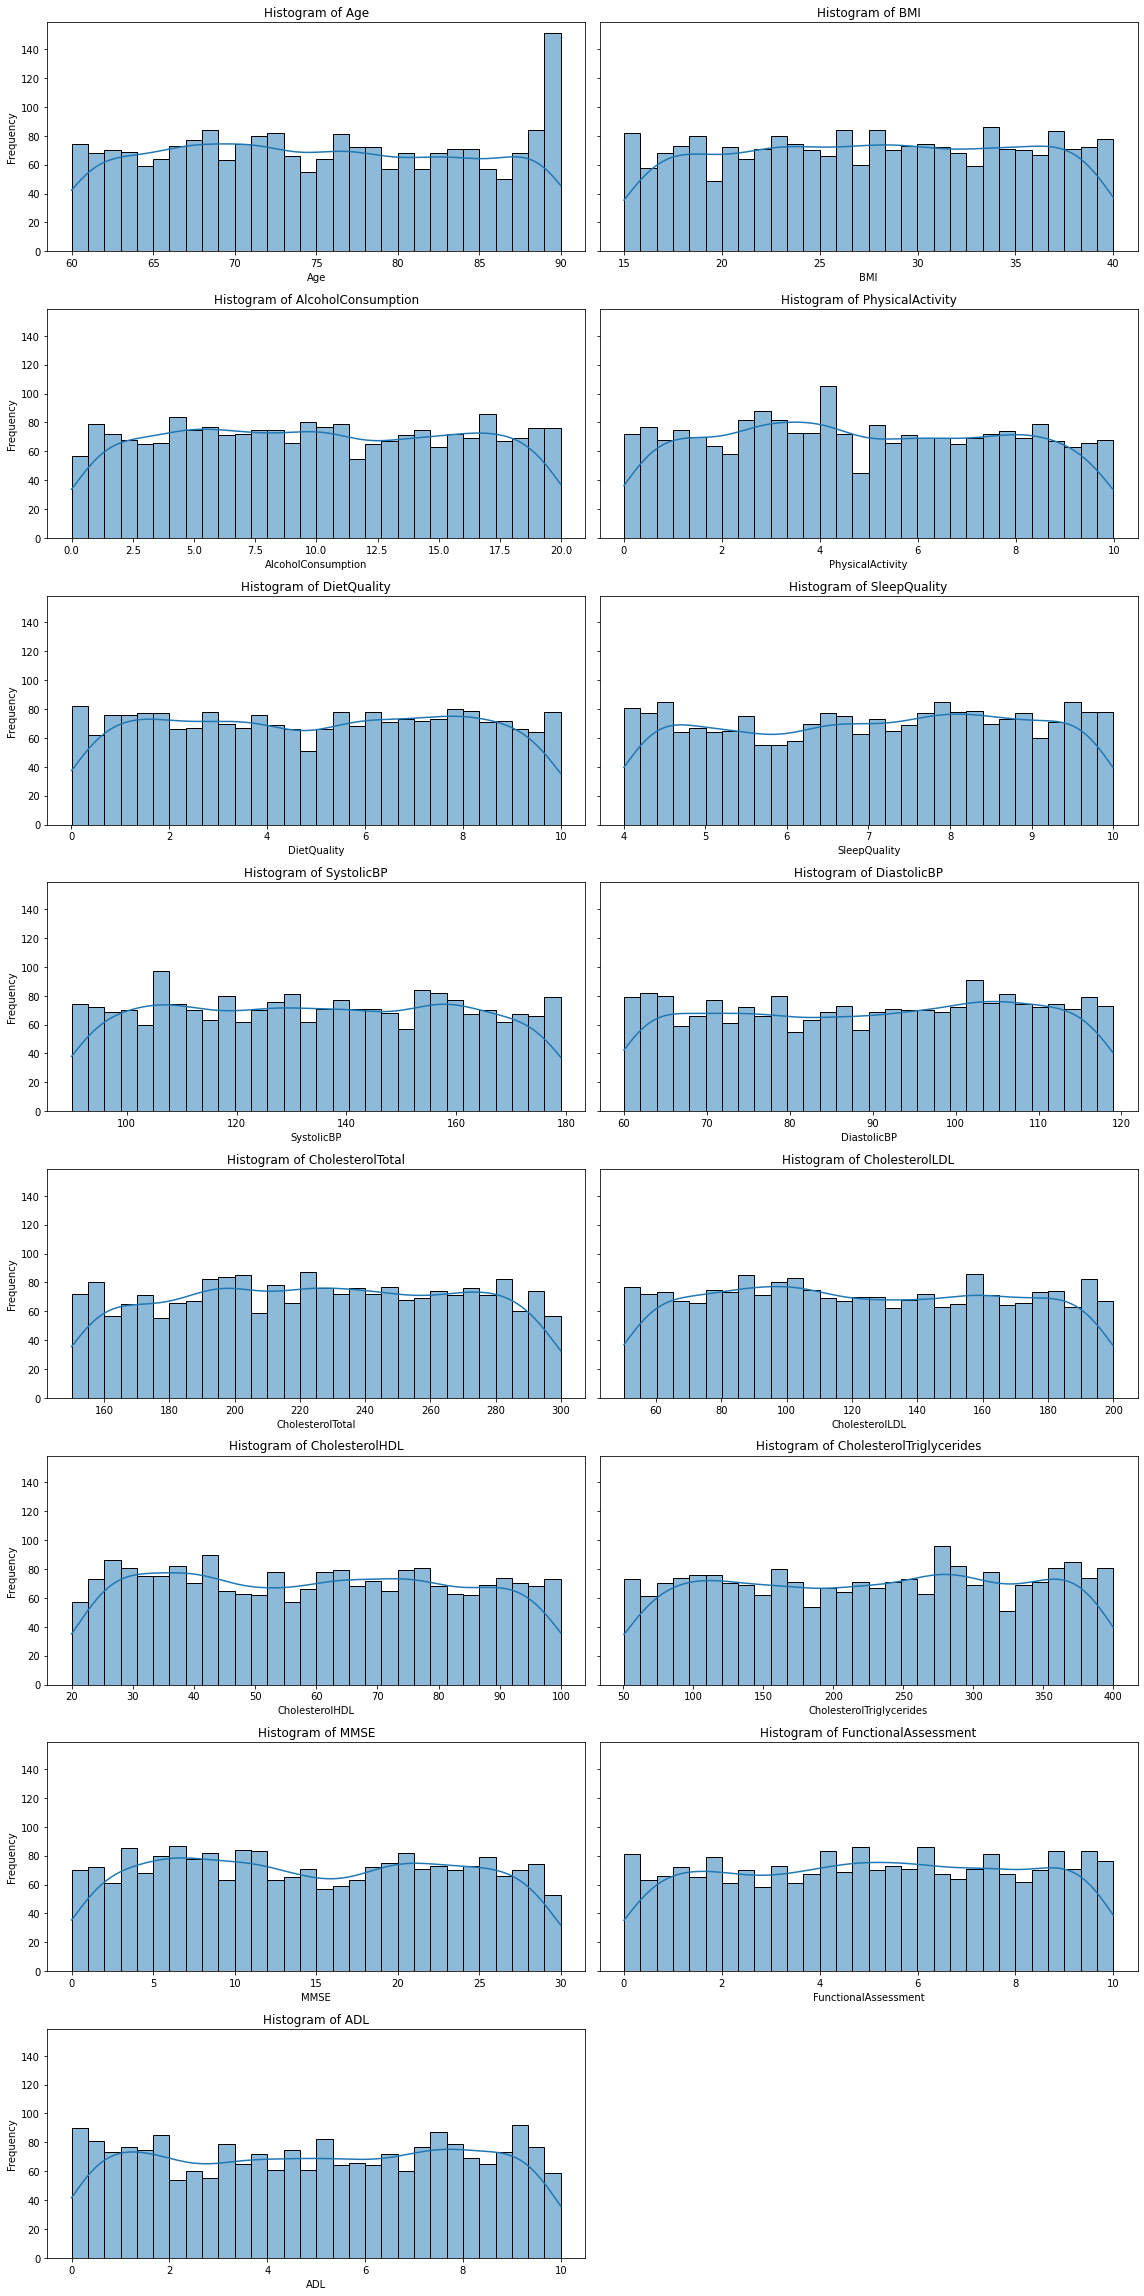

In [11]:
from show_distribution_correlation import plot_histograms, plot_distribution_with_hue, binary_distributions, correlation_with_target
plot_histograms(df, numeric_columns, ncols=2, kde=True, bins=30)

**Выводы по общему распределению числовых переменных:**

**Гистограмма возраста**
Данные сконцентрированы в возрасте от 60 до 90 лет.
Самая распространенная возрастная группа - 89-90 лет, частота около 140-150.
    
**Гистограмма BMI**
Наблюдается пик в районе 35, что может свидетельствовать о большом количестве людей с высоким BMI.
В диапазоне от 25 до 30 также наблюдается сравнительно высокое количество наблюдений. 
Диапазон значений BMI в выборке варьируется от 15 до 40.
В выборке есть как люди с нормальным весом (BMI в диапазоне 18,5-24,9), так и люди с ожирением.

**Гисторамма потребления алкоголя**
Потребление алкоголя варьируется от 0 до 20. Наблюдается несколько пиков, что говорит о том, что существует несколько наиболее часто встречающиеся уровни потребления алкоголя. 

**Гистограмма физической активности**
Большинство людей в выборке имеют уровень физической активности от 3 до 5. Пик находится около уровня физической активности 4, что предполагает, что это самый распространенный уровень. Гистограмма предполагает, что значительная часть выборки имеет умеренную физическую нагрузку.

**Гистограмма качества питания**
Пики около значений 0, 2, 3, 8 и 10. Разнообразные показатели у групп.

**Гистограмма качества сна**
Наиболее часто встречаются значения качества сна в диапазоне от 4 до 5, а также от 7 до 8 и 9 до 10. Меньше всего наблюдается качество сна в диапазоне от 5 до 6. Большинство людей имеют хорошее или среднее качество сна.

**Гистограмма значений систолического артериального давления**
Относительный пик приходится на 100 мм рт.ст. с частотой около 100. Данные имеют умеренный разброс.

**Гистограмма значений диастолического артериального давления**
Гистограмма указывает на слегка правостороннее смещение, что означает, что больше людей имеют более высокие значения DBP. 
Первый пик находится около 65-70 мм рт. ст., а второй — около 100-105 мм рт. ст.

**Гистограмма уровня холестерина**
Наибольшая частота наблюдений сосредоточена в диапазоне 200-250.

**Гистограмма холестерина липопротеинов низкой плотности**
Наиболее часты значения уровня холестерина LDL в диапазоне от 80 до 100 единиц, а также от 150 до 170 единиц.

**Гистограмма значений холестерина липопротеидов высокой плотности**
Пик распределения приходится на уровень HDL около 20-40.

**Гистограмма по количеству холестерина и триглицеридов**
Данные имеют относительно большой разброс, с наибольшей частотой в диапазоне от 250 до 300.

**Гистограмма MMSE(Mini-Mental State Examination - тест для оценки когнитивных функций)**
Больше наблюдений приходится на более низкие значения MMSE, чем на высокие. 
Наблюдаются пики в диапазонах от 5 до 15 и от 20 до 30, это наиболее часто встречающиеся значения MMSE. 

**Гистограмма функциональной оценки**
Гистограмма показывает, что значения функциональной оценки распределены равномерно от 0 до 10, с пиками в районе 4, 6 и 9.

**Гистограмма значений переменной "ADL" (Activities of Daily Living -  деятельность повседневной жизни)**
Наблюдается пик частоты встречаемости при значении ADL около 9. Дисперсия данных достаточно высокая, что свидетельствует о том, 
что в выборке есть люди с различным уровнем ADL.

Форма гистограмм этих признаков - "плато": значения распределены ненормально. Распределения близкие к равномерному.

#### Распределения числовых признаков в разрезе наличия/отсутствия диагностированной болезни Альцгеймера

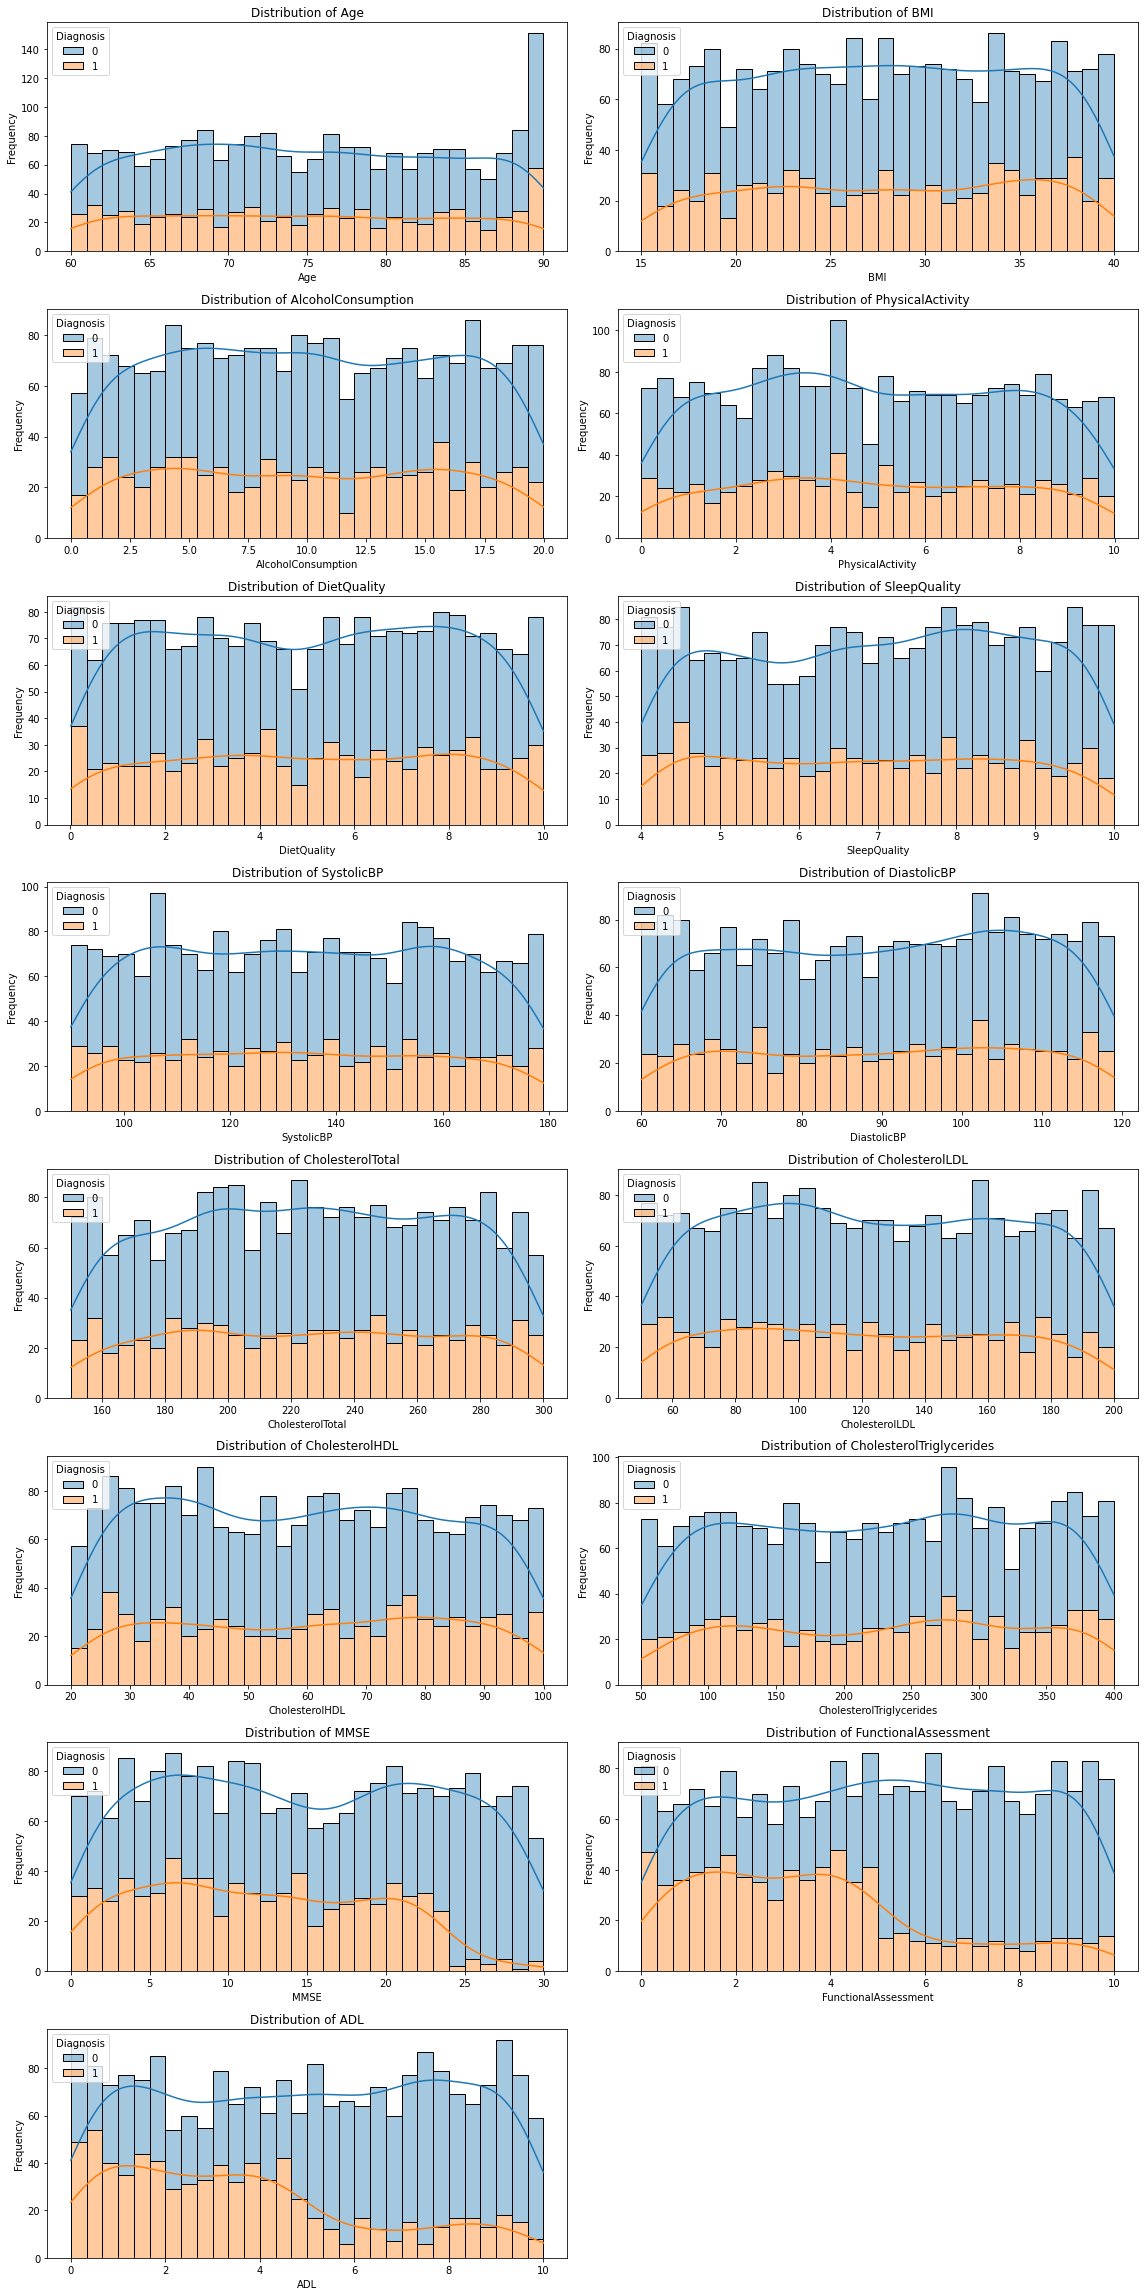

In [13]:
plot_distribution_with_hue(df, numeric_columns, 'Diagnosis', 2, 30)

**Выводы по распределению в разрезе диагноза:**

Сразу бросаются в глаза последние три переменные: `mmse`, `functional_assessment`, `adl`

**Распределение MMSE**:
Люди с диагнозом редко получают оценки MMSE выше 24-25. Те, у кого нет диагноза имеют более широкий диапазон значений MMSE, чем люди с диагнозом. У людей с диагнозом преобладают низкие значения MMSE (0-15). Это подтверждает тесную связь между когнитивными функциями и состоянием здоровья

**Распределение FunctionalAssessment**
Значения FunctionalAssessment в группе Diagnosis = 1, как правило, ниже, чем в группе Diagnosis = 0. У группы Diagnosis = 1 значения этой переменной в основном сосредоточены в диапазоне 0-4, а значения в группе Diagnosis = 0 более равномерно распределены по всему диапазону.
Таким образом, показатели FunctionalAssessment связаны с наличием диагноза: более высокие результаты соответствуют отсутствию диагноза, в то время как низкие результаты указывают на диагноз.

**Распределение ADL**
Из графика видно, что распределение значений ADL различается в зависимости от наличия/отсутствия диагноза. Чаще всего значения ADL с диагнозом сосредоточены в нижней части шкалы (0-4). Значения ADL для группы без диагноза более равномерно распределены, с несколько большим количеством наблюдений в районе оценки 5-8. График указывает на связь между наличием диагноза и ограничениями в повседневной активности.

Таким образом, можно выделить `mmse`, `functional_assessment`, `adl` как потенциальные предикторы, которые могут влиять на наличие диагноза.

#### Общее распределение бинарных признаков и распределение бинарных признаков в разрезе наличия/отсутствия диагностированной болезни Альцгеймера

In [12]:
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

C:\Users\Nataliia\ALZ\show_distribution_correlation.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(data=data, x=column, ax=axes[i],
C:\Users\Nataliia\ALZ\show_distribution_correlation.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(data=data, x=column, ax=axes[i],
C:\Users\Nataliia\ALZ\show_distribution_correlation.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(data=data, x=column, ax=axes[i],
C:\Users\Nataliia\ALZ\show_distribution_correlation.py:98: FutureWarning: 

Passing `palett

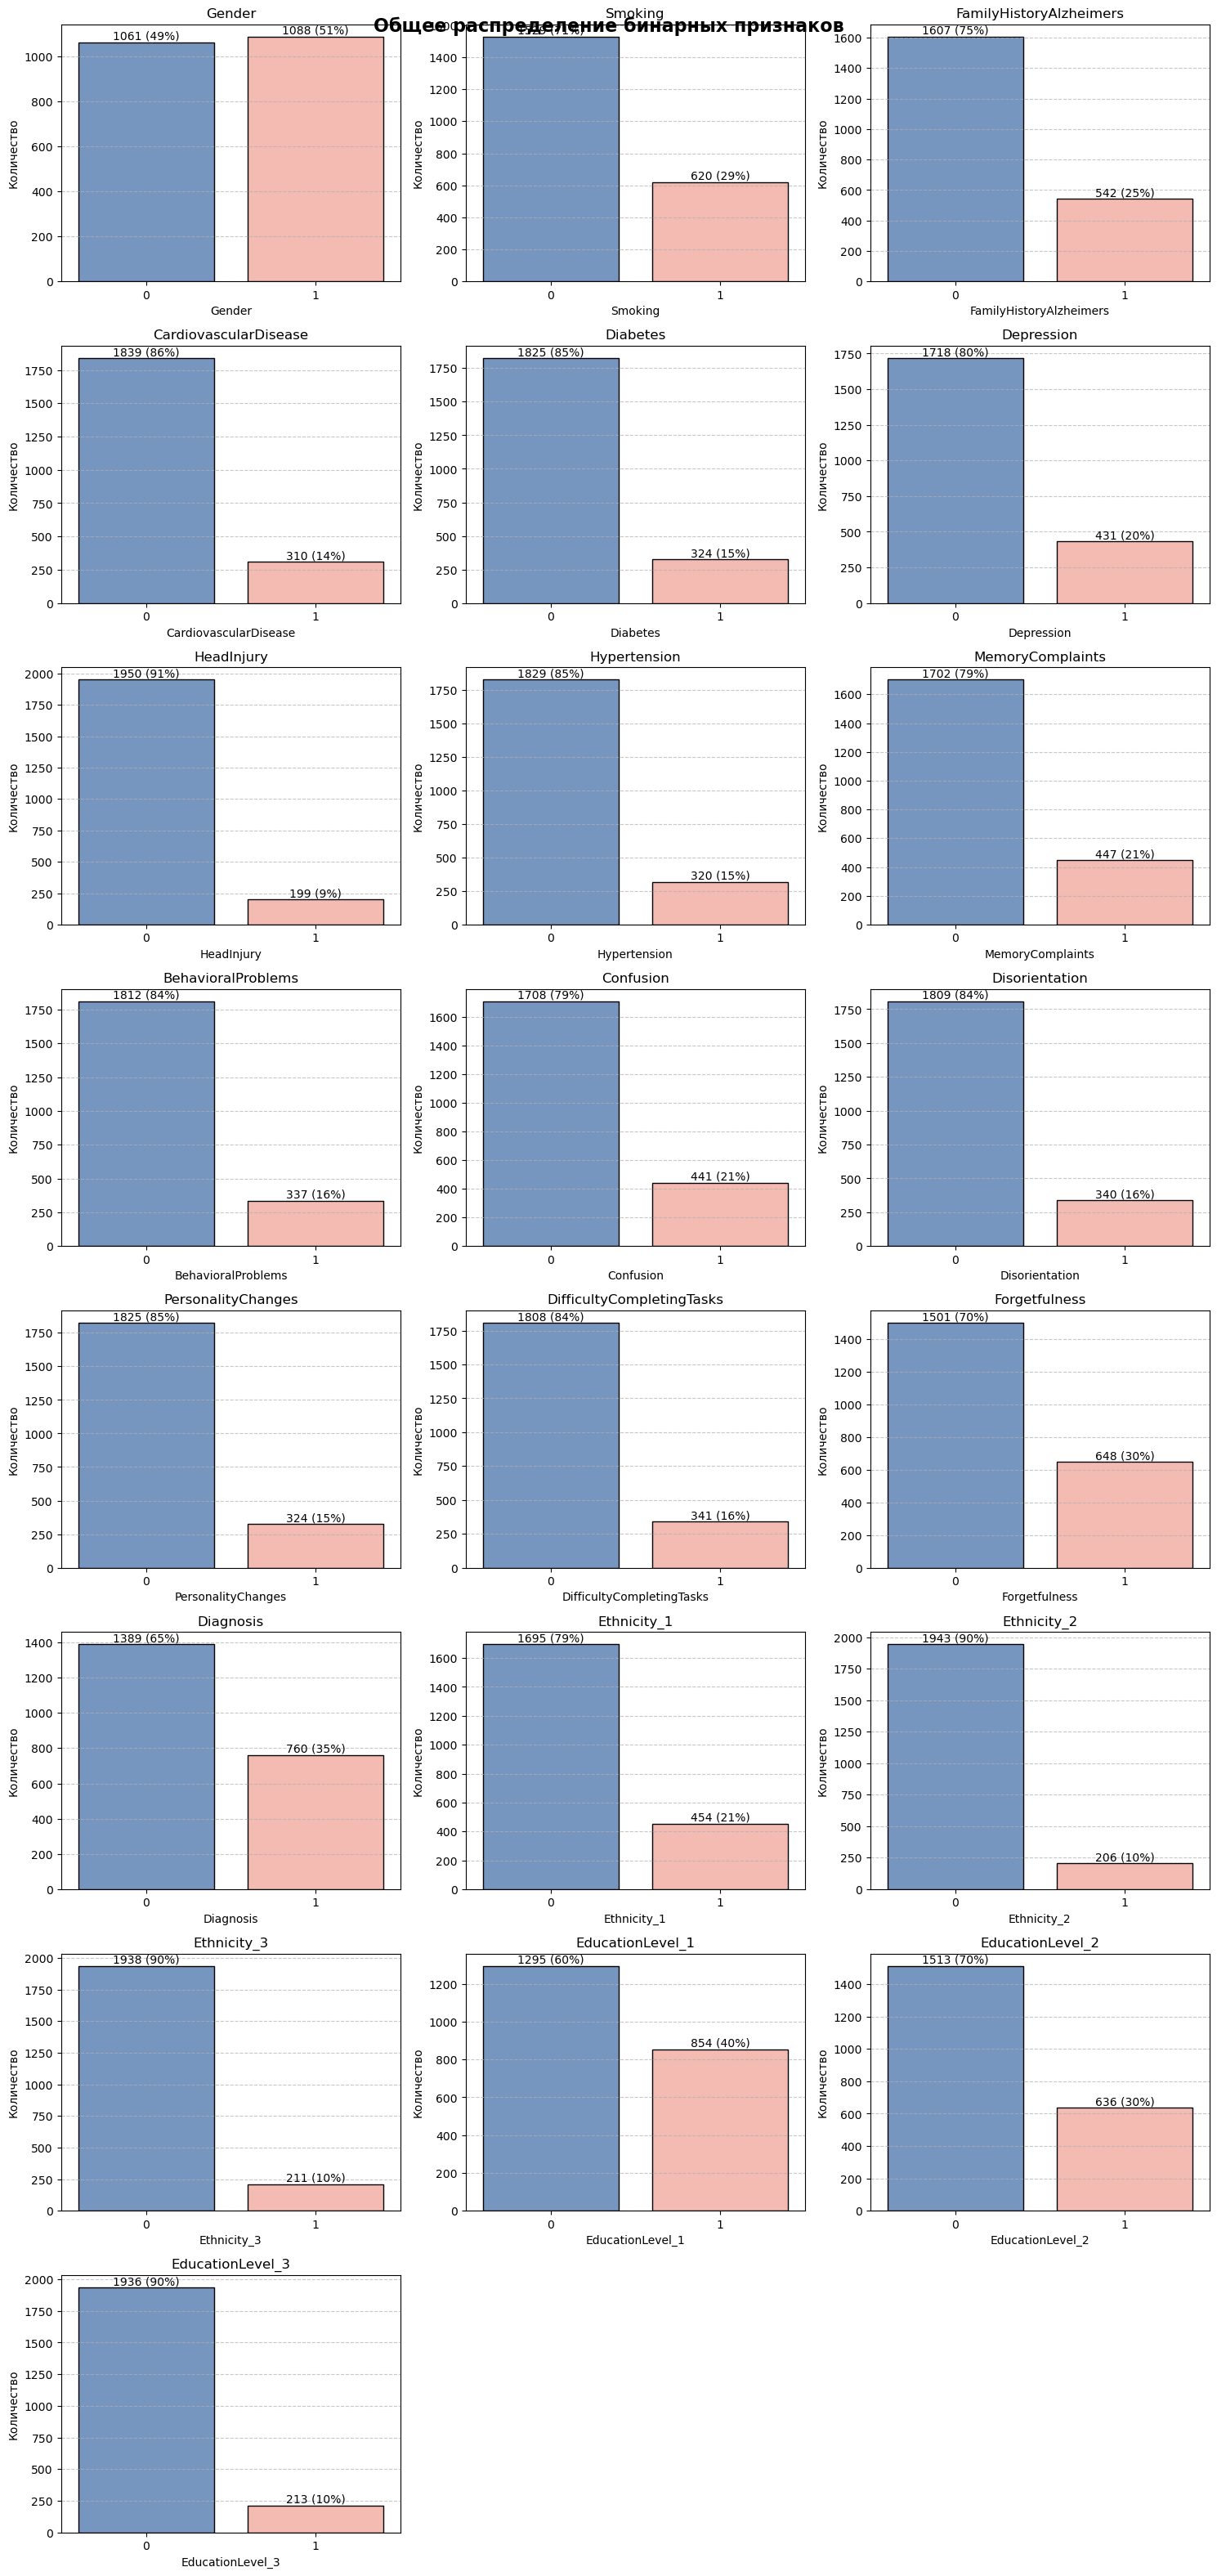

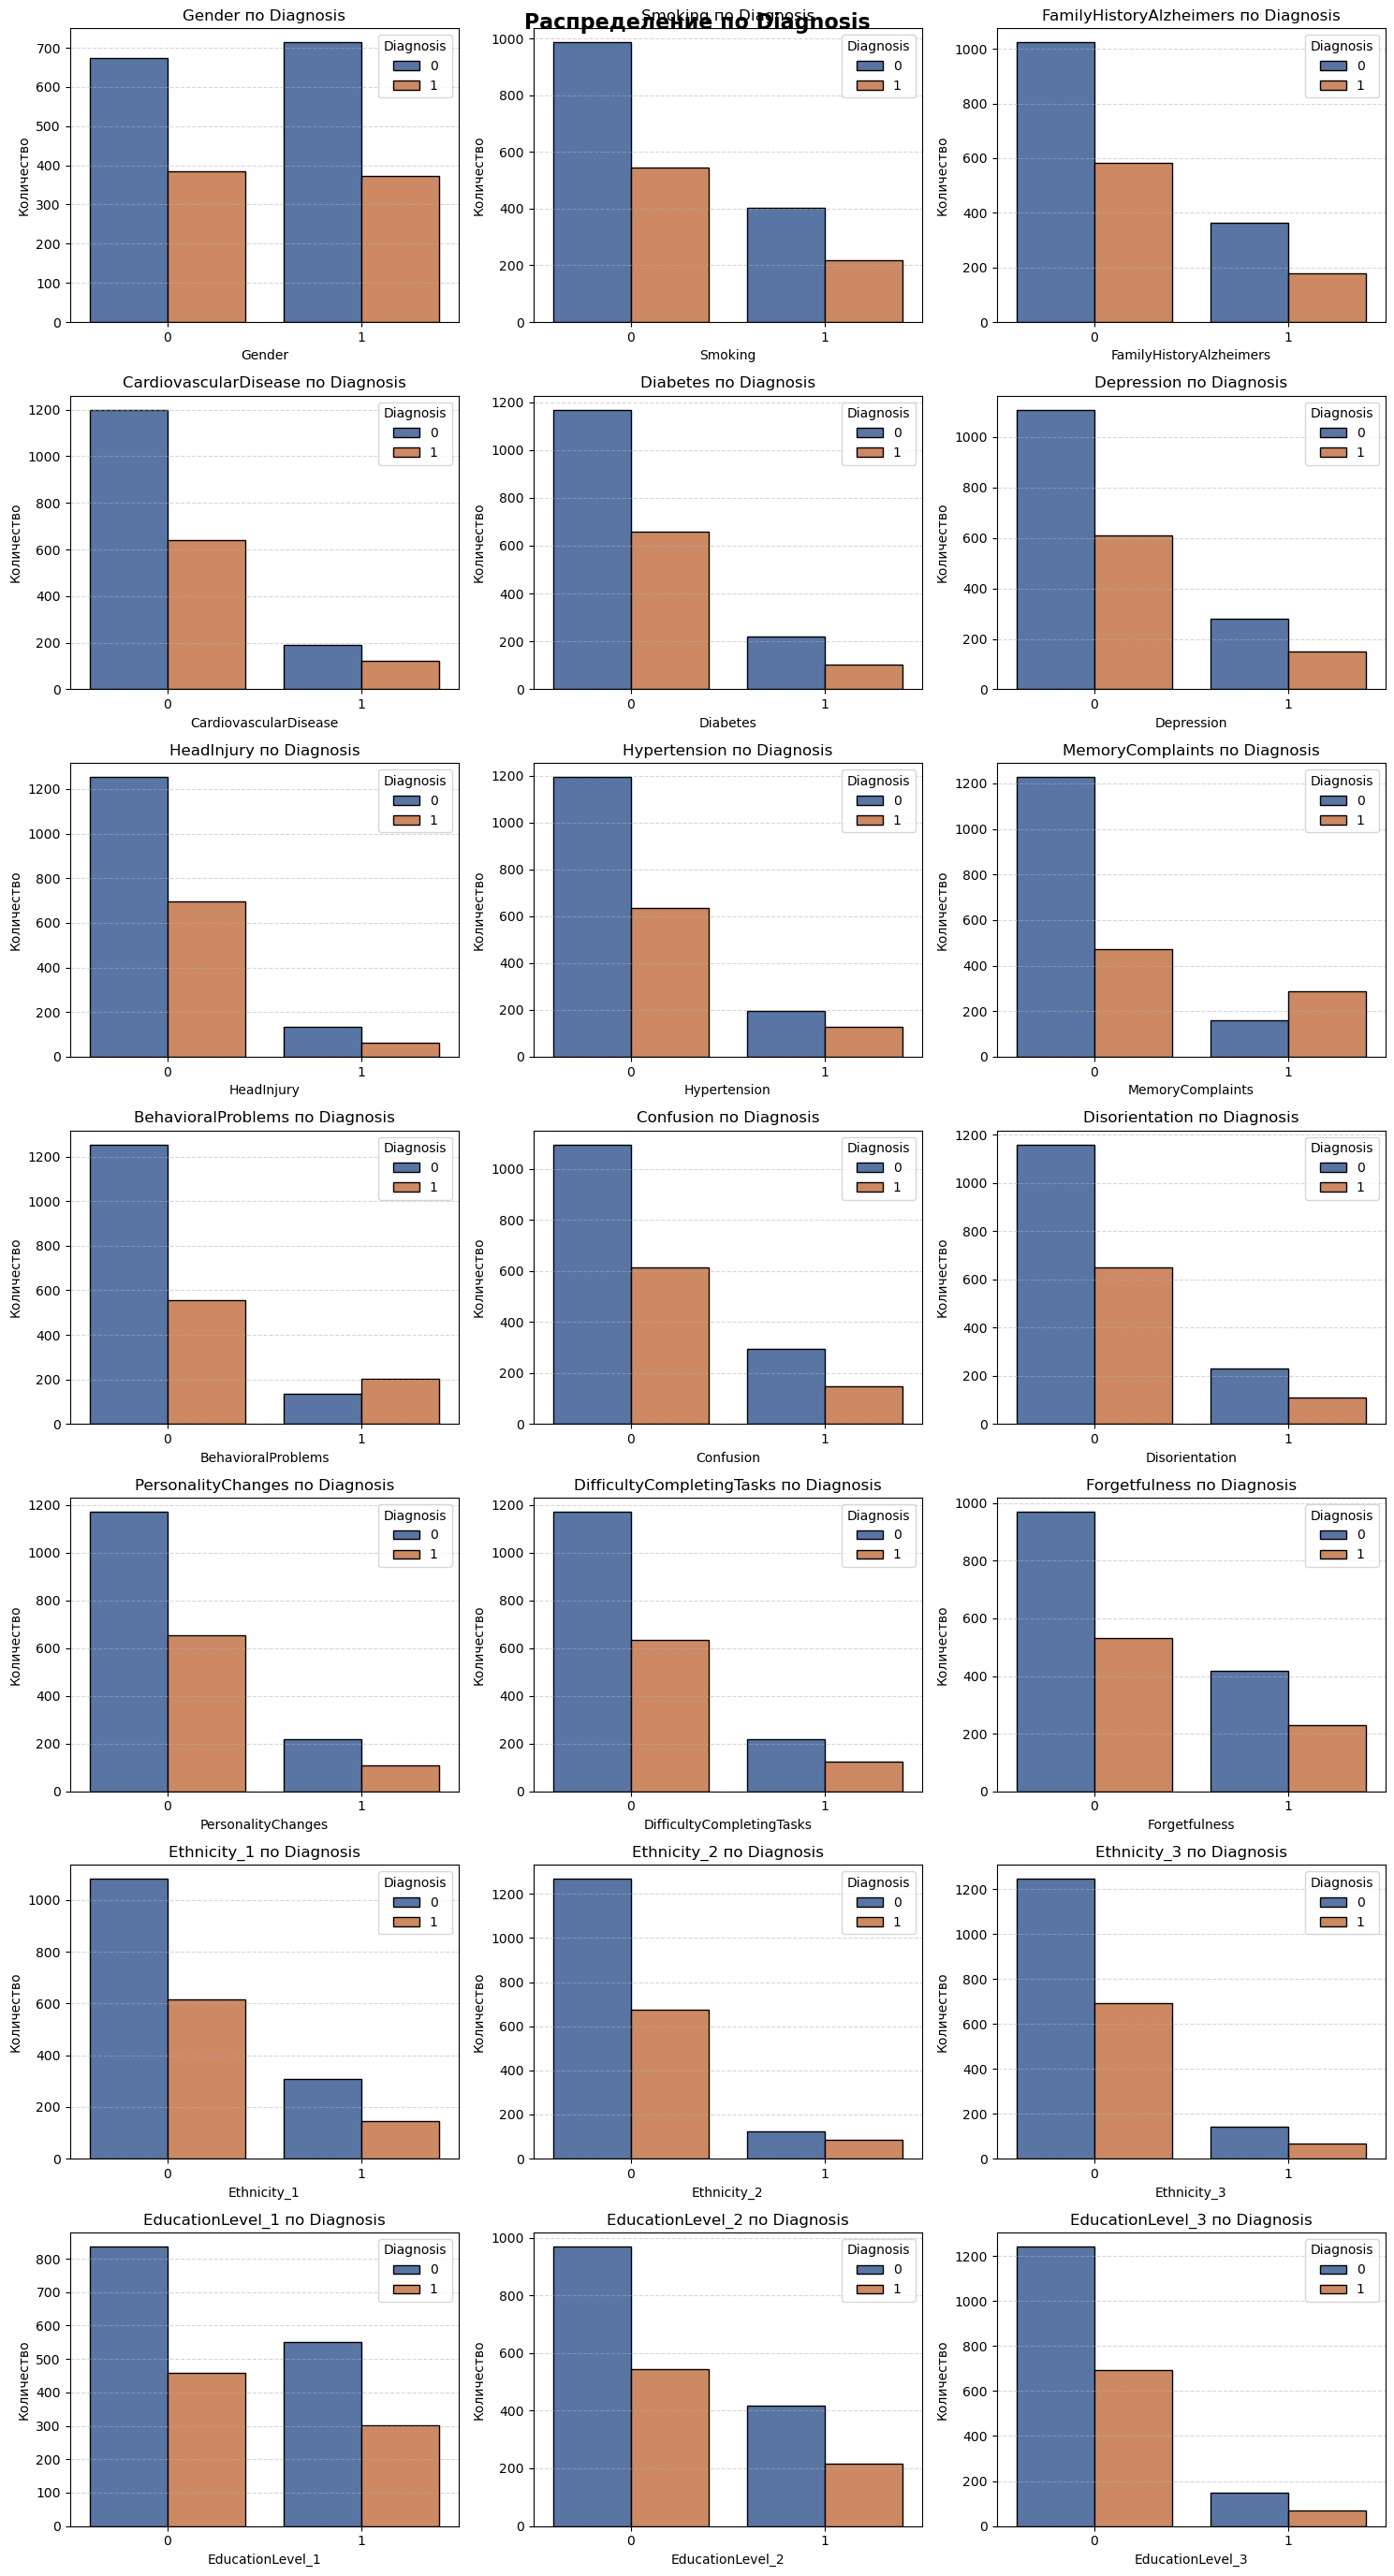

In [20]:
binary_distributions(df, binary_columns)

**По анализу общего распределения бинарных признаков можно сделать следующие выводы**

1. **Пол** (`gender`)
Распределение мужчин и женщин почти равномерное: мужчины составляют 51%, женщины – 49%. Баланс между полами говорит о том, что датасет не имеет сильного гендерного перекоса.


2. **Курение** (`smoking`)
Большинство респондентов не курят (71%), тогда как 29% являются курильщиками.


3. **Наследственная предрасположенность** (`family_history_alzheimers`)
У 75% опрошенных в семье не было случаев болезни Альцгеймера, но четверть респондентов (25%) сообщают о наличии родственников, страдающих этим заболеванием


4. **Сопутствующие заболевания**
    - Сердечно-сосудистые заболевания (`cardiovascular_disease`) – 86% респондентов их не имеют, в то время как 14% страдают от этих проблем.
    - Диабет (`diabetes`) – 15% респондентов больны диабетом, остальные 85% здоровы.
    - Гипертония (`hypertension`) – выявлена у 13% опрошенных.
    - Депрессия (`depression`) – 17% страдают этим заболеванием, остальные 83% не имеют депрессивных расстройств.
    - Травмы головы (`head_injury`) – встречаются реже всего, только у 10% респондентов.


5. **Когнитивные нарушения и изменения поведения**
    - Жалобы на ухудшение памяти (`memory_complaints`) – 30% респондентов отмечают проблемы с памятью, что может быть ранним сигналом когнитивных нарушений.
    - Дезориентация (`disorientation`) – 16% опрошенных испытывают трудности с ориентацией в пространстве и времени.
    - Трудности в выполнении повседневных задач (`difficulty_completing_tasks`) – 16% испытывают проблемы с повседневной деятельностью.
    - Изменения личности (`personality_changes`) и поведенческие проблемы (`behavioral_problems`) – встречаются у 10-15% респондентов.


6. **Распределение этнических групп** (`ethnicity`):
В выборке доминирует европеоидная раса.


7. **Уровень образования** (`educationlevel`):
Большинство имеют как минимум среднее образование.


8. **Целевая переменная** (`diagnosis`):

- 1389 человек (65%) не имеют диагноза "Болезнь Альцгеймера".
- 760 человек (35%) имеют установленный диагноз.

**Выводы по распределению бинарных признаков в разрезе диагноза**

Анализ распределения признаков среди пациентов с диагнозом болезни Альцгеймера и без него показывает, что для большинства характеристик доли заболевших и здоровых распределены примерно одинаково. Это говорит о том, что ряд факторов не демонстрирует значительных различий между группами. Однако, некоторые признаки проявляют выраженные различия, что может указывать на их важность в контексте диагностики болезни Альцгеймера:

- Жалобы на ухудшение памяти (`memory_complaints`)

- Поведенческие изменения (`behavioral_problems`)

Гораздо чаще наблюдаются у пациентов с болезнью Альцгеймера по сравнению со здоровыми респондентами.

## Изучим корреляции переменных

Ниже функция, которая выводит корреляции:
- числовых переменных друг с другом;
- бинарных признаков с числовыми;
-  бинарных признаков с бинарными.

Поскольку числовые переменные распределены ненормально, для оценки корреляции используется корреляция Спирмена и хи-квадрат.

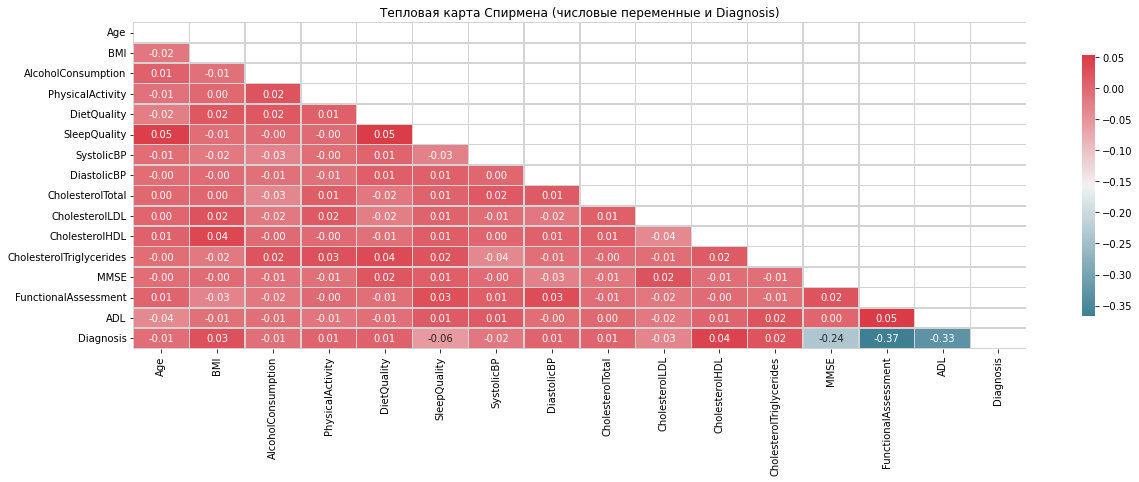


Значимые корреляции числовых переменных с Diagnosis (p < 0.05)


,Числовая,ρ (Спирмен),p-value
3,FunctionalAssessment,-0.37,0.000
4,ADL,-0.33,0.000
2,MMSE,-0.24,0.000
0,SleepQuality,-0.06,0.009
1,CholesterolHDL,0.04,0.049



Значимые связи бинарных переменных с Diagnosis (хи-квадрат, p < 0.05)


,Бинарная,χ² (хи-квадрат),p-value
2,Diagnosis,2144.63,0.0
0,MemoryComplaints,200.62,0.0
1,BehavioralProblems,106.88,0.0


In [13]:
correlation_with_target(df, "Diagnosis")

По тепловой карте и выводу результатов функции видно, что из числовых переменных заметно коррелируют с диагнозом:
- `MMSE`;
- `ADL`;
- `FunctionalAssessment`

Еще 2 переменные не показывают какую-то весомую корреляцию, но p-value, оцененное по Спирмену, показывает их статзначимость:
- `SleepQuality`;
- `CholesterolHDL`.

Из бинарных переменных Особо примечательными для нас являются эти две:

- `Memory Complaints VS Diagnosis` - cильная связь между жалобами на память и диагнозом. Жалобы на память могут быть важным индикатором для диагностики.

- `Behavioral Problems VS Diagnosis` - cвязь между поведенческими проблемами и диагнозом тоже намекаает на то, что `behavioral_problems` являются не последним по значимости фактором.

## Первичная оценка отобранных признаков при помощи OLS и логистической регрессии

Исходя из проведенного выше анализа связей между переменными, наиболее интересными кажутся переменные, показывающие значимую связь с целевой `diagnosis`:

- `mmse` (числовая);
- `functional_assessment` (числовая);
- `adl` (числовая);
- `memory_complaints` (бинарная);
- `behavioral_problems` (бинарная).

Все эти признаки обладают заметной корреляцией и очень низким p-value в комбинации с `diagnosis`.

Здесь большой корреляции не было замечено, но p_value показал себя на уровне статистической значимости по отношению к `diagnosis`:
- `sleep_quality`;
- `cholesterol_hdl`.

Теперь построим простую модель линейной регрессии со всеми предикторами и только с выбранными нами (выбранные признаки в списке `valid_cols`).

In [14]:
# заводим список выбранных переменных
valid_cols = ['MMSE', 'FunctionalAssessment', 'ADL', 'MemoryComplaints', 'BehavioralProblems', 'SleepQuality', 'CholesterolHDL']

**OLS со всеми предикторами**

In [15]:
def train_model(df, feature_columns, target_column, model_type):
    X = df[feature_columns]
    y = df[target_column]
    X = sm.add_constant(X)

    if model_type == 'OLS':
        model = sm.OLS(y, X)
    else:
        model = sm.Logit(y, X)

    res = model.fit()
    return print(res.summary())

train_model(df, df.drop(['Diagnosis'], axis=1).columns, 'Diagnosis', 'OLS')

                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     45.74
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          3.09e-234
Time:                        15:08:57   Log-Likelihood:                -844.16
No. Observations:                2149   AIC:                             1762.
Df Residuals:                    2112   BIC:                             1972.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**OLS с отобранными предикторами**

In [16]:
train_model(df, valid_cols, 'Diagnosis', 'OLS')

                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     231.0
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          3.60e-256
Time:                        15:12:39   Log-Likelihood:                -858.92
No. Observations:                2149   AIC:                             1734.
Df Residuals:                    2141   BIC:                             1779.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9835 

Заметно, что первая модель сложнее из-за большего числа предикторов и имеет незначительно больший R-squared, при этом скорректированный R-squared (более показательный) не отличается. 

Вторая модель проще - в ней намного меньше признаков, а объясняет дисперсию она, судя по R-squared, не хуже. У нее меньшие значения AIC и BIC и более высокая F-статистика, что указывает на лучшую общую значимость. А ещё вторая модель не содержит предупреждения The condition number is large, 6.08e+03. This might indicate that there are strong multicollinearity or other numerical problems, что свидетельствует о лучшей устойчивости.

OLS для нас не лучший выбор: поскольку целевая переменная является бинарной - в таком случае у OLS получаются ненормально распределенные остатки, что видим по Omnibus и Jarque-Bera (JB). Но она дала нам первичное представление о том, насколько хорошо отобранные переменные объясняют дисперсию.

Теперь построим логистическую регрессию - также выполним ее на всем наборе и только на отобранных признаках.

**Logit со всеми предикторами**

In [17]:
train_model(df, df.drop(['Diagnosis'], axis=1).columns, 'Diagnosis', 'Logit')

Optimization terminated successfully.
         Current function value: 0.366710
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2112
Method:                           MLE   Df Model:                           36
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                  0.4356
Time:                        15:12:45   Log-Likelihood:                -788.06
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                4.944e-232
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         5.4279      0.977      5.555      0.000       3.

**Logit с отобранными предикторами**

In [18]:
train_model(df, valid_cols, 'Diagnosis', 'Logit')

Optimization terminated successfully.
         Current function value: 0.372814
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2141
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                  0.4262
Time:                        15:12:50   Log-Likelihood:                -801.18
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                1.046e-252
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9733      0.370     10.726      0.000       3.247       4.699

Видим схожую картину: хотя логистическая модель показывает, что вариант со всеми предикторами справляется лучше, это "лучше" незначительное - оценки у моделей близки. При этом второй вариант (с отобранными значимыми предикторами) явно проще, так как не перегружен переменными, а значит меньше вероятность переобучения и того, что модель начнет кренить не в ту сторону.

Примечательно, что и OLS, и Logit видят признаки `SleepQuality` и `CholesterolHDL` как незначимые, хотя ранее оценка корреляции по Спирмену показала их значимость. Это может объясняться нелинейной связью этих переменных с `Diagnosis`, в то время как OLS и Logit обе линейные. Наличие статистически значимых различий по Спирмену указывает на то, что эти переменные могут улучшить качество прогноза и целесообразны к включению в модель.

**Итог**: EDA показал полезность ряда переменных для прогнозирования Diagnosis, а также подтвердил отсутствие серьёзных искажений данных. Следующий этап — построение и тестирование нескольких моделей машинного обучения для определения оптимального подхода к предсказанию болезни Альцгеймера.

## Этап 3. Проверка гипотез

**Болезнь Альцгеймера (БА)** — это нейродегенеративное заболевание, характеризующееся ухудшением памяти, когнитивных функций и прогрессирующей потерей способности к самостоятельной жизни.

Для иллюстрации различий между людьми без БА (`Diagnosis` = 0) и с БА (`Diagnosis` = 1) мы используем набор данных ***Alzheimer's Disease Dataset***, доступный на платформе Kaggle.

На предыдущих итерациях исследования были установлены следующие значимые для целевой переменной `diagnosis` признаки:

In [19]:
valid_cols = ['MMSE', 'FunctionalAssessment', 'ADL', 'MemoryComplaints', 'BehavioralProblems', 'SleepQuality', 'CholesterolHDL']

Качество логистической регрессии и p-value от неё для найденных признаков были следующими:

In [20]:
train_model(df, valid_cols, 'Diagnosis', 'Logit')

Optimization terminated successfully.
         Current function value: 0.372814
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2141
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                  0.4262
Time:                        15:12:57   Log-Likelihood:                -801.18
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                1.046e-252
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9733      0.370     10.726      0.000       3.247       4.699

На данном этапе исследования планируется выдвинуть четыре гипотезы о взаимосвязи следующих признаков с болезнью Альцгеймера:
- `MMSE` (оценка состояния когнитивных функций);
- `HDL` (уровень липопротеинов высокой плотности);
- `ADL` (оценка способности человека к выполнению повседневной деятельности);
- `MemoryComplaints` (жалобы на память).

### Гипотеза №1 - У пациентов с диагнозом БА оценка MMSE ниже, чем у пациентов без диагноза

`MMSE` используется как довольно чувствительный инструмент в диагностике БА, поскольку уже на ранней стадии болезни Альцгеймера пациенты, как правило, [набирают от 20 до 25 баллов](https://www.verywellhealth.com/mini-mental-state-exam-as-an-alzheimers-screening-test-98623) при норме ≥ 26-27. В дальнейшем без лечения у пациентов с болезнью Альцгеймера показатель `MMSE` ухудшается более чем на 5 баллов за два года.

На графике такие отличия видны:

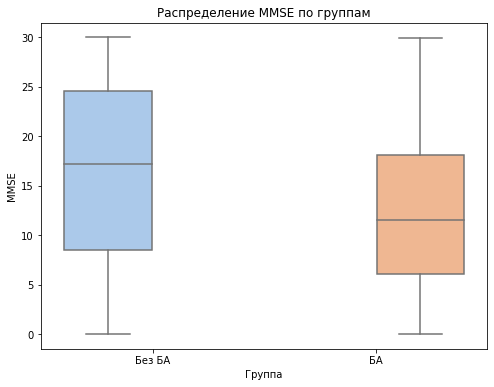

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='MMSE', hue='Diagnosis', data=df, palette='pastel')

# Убираем легенду (так как она избыточна при hue=Diagnosis)
plt.gca().legend_.remove()

# Настраиваем подписи осей
plt.xticks([0, 1], ['Без БА', 'БА'])
plt.title('Распределение MMSE по группам')
plt.xlabel('Группа')
plt.ylabel('MMSE')

plt.show()

В случае пациентов из исследуемого набора данных результаты логистической регрессии на этапе EDA показали, что уменьшение оценок `MMSE` положительно ассоциировано с диагнозом. В связи с этим выдвинуты следующие гипотезы:

```markdown
> H0: Распределения оценок MMSE в группах одинаковы.  
> H1: У пациентов с диагнозом БА MMSE ниже, чем у пациентов без диагноза.
```

На этапе EDA мы выяснили, что распределение `MMSE` ненормально. Однако у нас достаточно большая выборка, которая, согласно ЦПТ, должна вернуть достоверные результаты при использовании t-теста с критерием Уэлча:

In [22]:
mmse_with_diagnosis = df[df['Diagnosis'] == 1]['MMSE']
mmse_without_diagnosis = df[df['Diagnosis'] == 0]['MMSE']

# проводим односторонний тест - в параметр alternative проставляем less, так как в альтернативной гипотезе проверяем, что оценки MMSE меньше у 
# группы с диагнозом
u_stat, p_val = ttest_ind(mmse_with_diagnosis, mmse_without_diagnosis, equal_var=False, alternative='less')

alpha = 0.05
if p_val < alpha:
    print(f"Отвергаем нулевую гипотезу: P-value равен {p_val}, что меньше порогового уровня в {alpha}."
          f"\nЕсть основания утверждать, что оценка MMSE статистически значимо ниже у группы с диагнозом.\n")
else:
    print(f"Не отвергаем нулевую гипотезу: P-value равен {p_val}. \nСтатистически значимой разницы не обнаружено.\n")

Отвергаем нулевую гипотезу: P-value равен 2.0022805410128103e-32, что меньше порогового уровня в 0.05.
Есть основания утверждать, что оценка MMSE статистически значимо ниже у группы с диагнозом.



**Вывод:** Оценка `MMSE` достоверно ниже у пациентов с Болезнью Альцгеймера.

### Гипотеза №2 - У пациентов с диагнозом БА уровень HDL холестерина выше

В рамках данной гипотезы планируется исследовать взаимосвязь уровней `CholesterolHDL` и `Diagnosis`.

Интересно отметить, что HDL-холестерин обычно считается "хорошим" холестерином. Многие исследования, которые анализируют связь болезни Альцгеймера с различными факторами здоровья или окружающей среды, обычно показывают результаты, указывающие на то, что *"более высокий уровень HDL уменьшает риск развития болезни Альцгеймера"*. Однако в последние годы крупные исследования (например, [это](https://www.neurology.org/doi/10.1212/WNL.0000000000207876) и [это](https://pubmed.ncbi.nlm.nih.gov/37195665/)) показали, что всё не так однозначно.

Результаты логистической регрессии на этапе EDA показали, что увеличение уровня `CholesterolHDL` положительно ассоциировано с диагнозом. Опять же, на графике можно предварительно увидеть, что у пациентов с БА из данного набора действительно немного выше данный маркер:

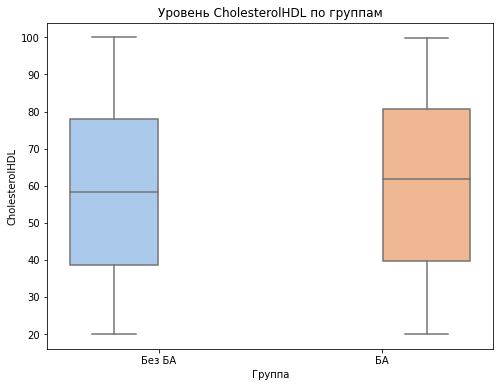

In [23]:
plt.figure(figsize=(8, 6))
box = sns.boxplot(x='Diagnosis', y='CholesterolHDL', hue='Diagnosis', 
                 data=df, palette='pastel')

# Удаляем легенду (она избыточна, так как hue совпадает с x)
box.legend_.remove()

# Настраиваем подписи
plt.xticks([0, 1], ['Без БА', 'БА'])
plt.title('Уровень CholesterolHDL по группам')
plt.xlabel('Группа')
plt.ylabel('CholesterolHDL')
plt.show()

Потому выдвигаются следующие гипотезы:

```markdown
> H0: "Уровень HDL холестерина не отличается у пациентов с диагнозом БА и без него."
> H1: "У пациентов с Болезнью Альцгеймера уровень HDL холестерина выше, чем у лиц без диагноза."
```

Снова применим односторонний т-тест и критерий Уэлча:

In [24]:
hdl_with_diagnosis = df[df['Diagnosis'] == 1]['CholesterolHDL']
hdl_without_diagnosis = df[df['Diagnosis'] == 0]['CholesterolHDL']

# в параметр alternative проставляем greater, так как в альтернативной гипотезе проверяем, что значения cholesterol_hdl больше у группы с диагнозом
u_stat, p_val = ttest_ind(hdl_with_diagnosis, hdl_without_diagnosis, equal_var=False, alternative='greater')

alpha = 0.05
if p_val < alpha:
    print(f"Отвергаем нулевую гипотезу: P-value равен {p_val}, что меньше порогового уровня в {alpha}."
          f"\nЕсть основания утверждать, что CholesterolHDL статистически значимо выше у группы с диагнозом.\n")
else:
    print(f"Не отвергаем нулевую гипотезу: P-value равен {p_val}. \nСтатистически значимой разницы не обнаружено.\n")

Отвергаем нулевую гипотезу: P-value равен 0.024474916969569774, что меньше порогового уровня в 0.05.
Есть основания утверждать, что CholesterolHDL статистически значимо выше у группы с диагнозом.



Вывод: CholesterolHDL выше у пациентов с Болезнью Альцгеймера.

### Гипотеза №3 - Показатель ADL ниже у пациентов с БА

Оценка `ADL` (Activities of Daily Living) показывает насколько человек самостоятелен и независим в плане быта. Проблемы с функционированием в быту являются [диагностическими критериями](https://diseases.medelement.com/disease/когнитивные-расстройства-у-лиц-пожилого-и-старческого-возраста-кр-рф-2024/18249) в действующих российских клинических рекомендациях для постановки деменции, в частности Болезни Альцгеймера.

На этапе EDA логистическая регрессия показала, что уменьшение оценок `ADL` положительно связано с диагнозом. На графике ниже также видим достаточно показательную картину:

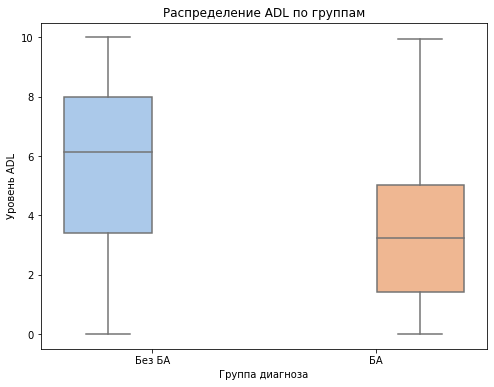

In [25]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Diagnosis', y='ADL', hue='Diagnosis', 
                data=df, palette='pastel')

# Удаляем избыточную легенду
ax.legend_.remove()

# Настраиваем подписи
plt.xticks([0, 1], ['Без БА', 'БА'])
plt.title('Распределение ADL по группам')
plt.xlabel('Группа диагноза')
plt.ylabel('Уровень ADL')
plt.show()

Проверим такие гипотезы:

> H0: "Уровень ADL не отличается у пациентов с диагнозом БА и без него."
> H1: "У пациентов с Болезнью Альцгеймера уровень ADL ниже, чем у лиц без диагноза."

Применяем односторонний тест, поскольку, как и ранее, визуально видно, что одна группа имеет значения больше другой:

In [26]:
adl_with_diagnosis = df[df['Diagnosis'] == 1]['ADL']
adl_without_diagnosis = df[df['Diagnosis'] == 0]['ADL']

u_stat, p_val = ttest_ind(adl_with_diagnosis, adl_without_diagnosis, equal_var=False, alternative='less')

alpha = 0.05
if p_val < alpha:
    print(f"Отвергаем нулевую гипотезу: P-value равен {p_val}, что меньше порогового уровня в {alpha}."
          f"\nЕсть основания утверждать, что ADL статистически значимо ниже у группы с диагнозом.\n")
else:
    print(f"Не отвергаем нулевую гипотезу: P-value равен {p_val}. \nСтатистически значимой разницы не обнаружено.\n")

Отвергаем нулевую гипотезу: P-value равен 3.0111584421649697e-57, что меньше порогового уровня в 0.05.
Есть основания утверждать, что ADL статистически значимо ниже у группы с диагнозом.



**Вывод:** Оценка `ADL` ниже у пациентов с Болезнью Альцгеймера.

### Гипотеза №4 - Встречаемость жалоб на память у пациентов с БА и без неё отличается

На преддементных стадиях болезни Альцгеймера, когда снижение памяти является практически единственным клиническим симптомом, предварительный диагноз по критериям NINCDS–ADRDA формулируется как "*возможная болезнь Альцгеймера*". В связи с этим, прогрессирующее снижение памяти часто вызывает подозрения на наличие БА у пациентов.

Кроме того, показатель `MemoryComplaints`рассматривается как значимый предиктор в ряде клинических исследований (например, [здесь](https://pubmed.ncbi.nlm.nih.gov/21841255/) и [здесь](https://www.neurology.org/doi/10.1212/01.wnl.0000242734.16663.09)).

В наших данных этот признак тоже довольно показателен:

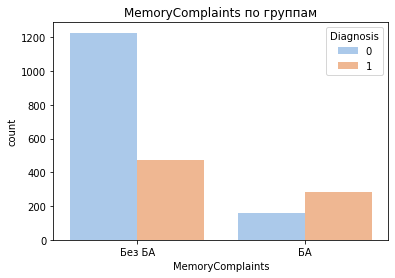

In [27]:
sns.countplot(x='MemoryComplaints', hue='Diagnosis', data=df, palette='pastel')
plt.xticks([0, 1], ['Без БА', 'БА'])
plt.title('MemoryComplaints по группам')
plt.show()

Несмотря на то, что жалобы на память могут возникать и у лиц без диагноза болезни Альцгеймера (включая такие случаи, как иные формы деменции или просто возрастные изменения), в группе с болезнью Альцгеймера наличие жалоб на память наблюдается значительно чаще.

Исходя из этого, сформулируем следующие гипотезы:

```markdown
> H0: "Показатель MemoryComplaints одинаков у пациентов с диагнозом БА и без него."
> H1: "Показатель MemoryComplaints отличается у пациентов с диагнозом БА и без него."
```

Поскольку этот предиктор является бинарным, проведем оценку на статистическую значимость при помощи хи-квадрата:

In [28]:
no_alz_mem = df[df['Diagnosis'] == 0]['MemoryComplaints'].mean() * 100
alz_mem  = df[df['Diagnosis'] == 1]['MemoryComplaints'].mean() * 100

def chi2_p(column):
    table = pd.crosstab(df['Diagnosis'], df[column] > 0)
    return chi2_contingency(table)[1]

p_memory = chi2_p('MemoryComplaints')

alpha = 0.05
if p_memory < alpha:
    print(f"Отвергаем нулевую гипотезу: P-value равен {p_memory}, что меньше порогового уровня в {alpha}."
          f"\nЕсть основания утверждать, что MemoryComplaints статистически значимо различается для группы с диагнозом БА и группы без него.\n")
else:
    print(f"Не отвергаем нулевую гипотезу: P-value равен {p_memory}." 
          f"\nСтатистически значимой разницы между группами по показателю MemoryComplaints не обнаружено.\n")

Отвергаем нулевую гипотезу: P-value равен 1.5266050985264054e-45, что меньше порогового уровня в 0.05.
Есть основания утверждать, что MemoryComplaints статистически значимо различается для группы с диагнозом БА и группы без него.



**Вывод:** `MemoryComplaints` демонстрирует статистически значимые различия между группой с болезнью Альцгеймера, и группой без данного заболевания.

### Общие выводы:

На основании проведенного анализа гипотез были сделаны следующие выводы:

1. **По гипотезе 1:** Анализ показал крайне малое значение p-value, значительно меньшее, чем порог значимости 0.05. Это указывает на наличие статистически значимых доказательств того, что оценка `MMSE` у группы с диагнозом ниже, чем у группы без диагноза.

2. **По гипотезе 2:** Для второй гипотезы p-value составило ~0.0245, что также ниже порогового уровня 0.05. Следовательно, можно заключить, что уровень `CholesterolHDL` статистически значимо выше у группы с диагнозом.

3. **По гипотезе 3:** Было получено очень небольшое p-value, что подтверждает, что оценка `ADL` у группы с диагнозом достоверно ниже, чем у группы без диагноза.

4. **По гипотезе 4:** При помощи теста хи-квадрат выявлены значимые различия в показателе `MemoryComplaints` для группы с диагнозом БА и без него.

Таким образом, данные предикторы и полученную информацию целесообразно использовать в дальнейшем для модели предсказания Болезни Альцгеймера и её интерпретации.

## Этап 4: Построение модели. Оценка качества модели

На предыдущих этапах исследования были отобраны переменные, показывающие значимую связь с целевой diagnosis. 

Разделим отобранные ранее данные на feature и target

In [29]:
y = df['Diagnosis']
X = df[valid_cols]

Посмотрим, есть ли дисбаланс классов

In [30]:
df.groupby('Diagnosis').size().to_frame('Count').assign(Percentage=lambda x: x['Count'] / x['Count'].sum() * 100).round(2)

,Count,Percentage
Diagnosis,,
0,1389,64.63
1,760,35.37


Для построения моделей разделим данные на train и test с соотношением 70/30 так как у нас небольшой объём данных (2149 строк) и наблюдается дисбаланс классов. Увеличенная тестовая выборка позволяет получить более стабильную оценку таких метрик, как precision и recall. Используем stratify=y, чтобы сохранить исходные пропорции классов в обеих частях. 

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(f'Размеры обучающей выборки: {X_train.shape}, {y_train.shape}')
print(f'Размеры тестовой выборки: {X_test.shape}, {y_test.shape}')

def class_distribution(y, name):
    counts = np.unique(y, return_counts=True)
    total = len(y)
    print(f"\n{name}:")
    for cls, cnt in zip(counts[0], counts[1]):
        print(f"Класс {cls}: {cnt} ({cnt / total:.2%})")

class_distribution(y_train, "Распределение классов в train")
class_distribution(y_test, "Распределение классов в test")

Размеры обучающей выборки: (1504, 7), (1504,)
Размеры тестовой выборки: (645, 7), (645,)

Распределение классов в train:
Класс 0: 972 (64.63%)
Класс 1: 532 (35.37%)

Распределение классов в test:
Класс 0: 417 (64.65%)
Класс 1: 228 (35.35%)


### Logistic Regression

В качестве базовой модели выбрана **логистическая регрессия**, к которой будут применены следующие подходы для улучшения качества предсказания на несбалансированных данных. 

- **Weighted Logistic Regression**  
  Используется параметр `class_weight='balanced'` для учёта дисбаланса классов.

- **Logistic Regression with synthetic oversampling using SMOTE**  
  Увеличивает количество примеров в классе-меньшинстве перед обучением модели.

- **Logistic Regression with Random Under-sampling and Class Weights**  
  Уменьшает размер класса-большинства для выравнивания пропорций классов.

- **Logistic Regression with GridSearchCV and SMOTEENN balancing**  
  Подбор гиперпараметров с одновременной балансировкой классов с помощью комбинации SMOTE и Edited Nearest Neighbours (SMOTEENN).

Эти модели представляют собой разные стратегии борьбы с дисбалансом классов при использовании одного и того же классификатора (логистической регрессии). 
Все рассматриваемые модели:

- Используют стандартизацию признаков через `StandardScaler`  
  *(важно для логистической регрессии, так как она чувствительна к масштабу признаков)*
  Стандартизация признаков нормализует данные к среднему 0 и дисперсии 1, так как логистическая регрессия чувствительна к масштабу признаков.

- Решают одну и ту же задачу бинарной классификации

- Борются с проблемой несбалансированных классов

In [42]:
! /opt/tljh/user/bin/python -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [43]:
!pip install scikit-learn==1.0.2 imbalanced-learn==0.8.1


Defaulting to user installation because normal site-packages is not writeable


## Описание используемых методов



### Weighted Logistic Regression

Этот метод учитывает дисбаланс классов за счёт задания **весов классам**, обратных их частоте в данных. 
Веса классов (`class_weight='balanced'`) — увеличивает вес редкого класса (пациенты с заболеванием), чтобы модель обращала на него больше внимания, чтобы модель не игнорировала меньший класс (`1`) и минимизировала количество ложных отрицаний.


### Logistic Regression + SMOTE

Этот метод борется с дисбалансом за счёт увеличения числа примеров в классе-меньшинстве искусственным способом.SMOTE генерирует новые образцы в классе `1`, искусственно выравнивая соотношение классов. Стандартизация признаков необходима, так как метод основан на расстоянии между точками. Увеличение количества примеров больных пациентов помогает модели лучше понять их особенности и реже их пропускать.


### Undersampling + Weighted Logistic Regression

Метод сочетает два подхода: уменьшение размера большего класса и усиление внимания к меньшему. RandomUnderSampler случайным образом удаляет часть объектов из большего класса (`0`), что позволяет снизить дисбаланс двумя способами сразу, уменьшая преобладание здоровых пациентов и усиливая внимание к больным.


### GridSearchCV + SMOTEENN

Самый продвинутый метод, объединяющий оптимизацию гиперпараметров, очистку данных и борьбу с дисбалансом.
**SMOTEENN** — комбинация SMOTE (oversampling) и ENN (удаление шума и противоречий), что позволяет не только выровнять классы, но и очистить данные.

**GridSearchCV** — подбор наилучших гиперпараметров модели под конкретную задачу, чтобы получить максимально точную модель, которая хорошо справляется с дисбалансом, устойчива к шуму в данных, адаптирована под медицинскую задачу с акцентом на минимизацию FN.

Все методы направлены на одну цель — **максимально точно определить, болен ли человек**, особенно важно не пропустить настоящего пациента с заболеванием.


In [32]:
    def get_metrics(y_true, y_pred, y_proba, prefix=' '):
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        roc = roc_auc_score(y_true, y_proba)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        return {
            f'{prefix}_Accuracy': acc,
            f'{prefix}_Precision': prec,
            f'{prefix}_Recall': rec,
            f'{prefix}_F1': f1,
            f'{prefix}_ROC-AUC': roc,
            f'{prefix}_True Negative': tn,
            f'{prefix}_False Positive': fp,
            f'{prefix}_False Negative': fn,
            f'{prefix}_True Positive': tp
        }
    

In [33]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
import pandas as pd

def evaluate_model(model, X_train, y_train, X_test, y_test, method_name):
    model.fit(X_train, y_train)
    
    # Предсказания и вероятности для train
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    
    # Предсказания и вероятности для test
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    
    metrics_train = get_metrics(y_train, y_train_pred, y_train_proba, prefix='Train')
    metrics_test = get_metrics(y_test, y_test_pred, y_test_proba, prefix='Test')
    
    metrics = {'Method': method_name}
    metrics.update(metrics_train)
    metrics.update(metrics_test)
    
    return metrics



results = []

# Метод 1: Weighted Logistic Regression
Weighted_Logistic_Regression = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42, class_weight='balanced'))
])
results.append(evaluate_model(Weighted_Logistic_Regression, X_train, y_train, X_test, y_test, 'Weighted_Logistic_Regression'))

# Метод 2: Logistic Regression + SMOTE
Logistic_Regression_SMOTE = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(random_state=42))
])
results.append(evaluate_model(Logistic_Regression_SMOTE, X_train, y_train, X_test, y_test, 'Logistic Regression + SMOTE'))

# Метод 3: Undersampling + Weighted Logistic Regression
Undersampling_Weighted_LR = ImbPipeline([
    ('scaler', StandardScaler()),
    ('under', RandomUnderSampler(random_state=42)),
    ('clf', LogisticRegression(random_state=42, class_weight='balanced'))
])
results.append(evaluate_model(Undersampling_Weighted_LR, X_train, y_train, X_test, y_test, 'Undersampling + Weighted Logistic Regression'))

# Метод 4: GridSearchCV + SMOTEENN + Logistic Regression
pipeline_gs = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

param_grid = {
    'classifier__C': [0.1, 0.5, 1],
    'classifier__class_weight': [None, {0: 1, 1: 1.2}]
}

grid_search = GridSearchCV(
    estimator=pipeline_gs,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=1,
    verbose=0
)

grid_search.fit(X_train, y_train)
GridSearchCV_SMOTEENN_LR = grid_search.best_estimator_

metrics_gs = evaluate_model(GridSearchCV_SMOTEENN_LR, X_train, y_train, X_test, y_test, 'LogisticRegression + GridSearchCV + SMOTEEN')
results.append(metrics_gs)

results_df = pd.DataFrame(results).set_index('Method')

# Переупорядочиваем столбцы, чтобы метрики train и test шли рядом
base_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC',
                'True Negative', 'False Positive', 'False Negative', 'True Positive']

ordered_columns = []
for metric in base_metrics:
    ordered_columns.append(f'Train_{metric}')
    ordered_columns.append(f'Test_{metric}')

results_df = results_df[ordered_columns]

pd.set_option('display.float_format', '{:.4f}'.format)
print("Метрики модели LogisticRegression")
display(results_df)


print("\nЛучшие параметры GridSearchCV:")
print(grid_search.best_params_)


Метрики модели LogisticRegression


,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_ROC-AUC,Test_ROC-AUC,Train_True Negative,Test_True Negative,Train_False Positive,Test_False Positive,Train_False Negative,Test_False Negative,Train_True Positive,Test_True Positive
Method,,,,,,,,,,,,,,,,,,
Weighted_Logistic_Regression,0.8278,0.8233,0.7220,0.7065,0.8346,0.8553,0.7742,0.7738,0.9072,0.8995,801,336,171,81,88,33,444,195
Logistic Regression + SMOTE,0.8318,0.8171,0.7306,0.7007,0.8308,0.8421,0.7775,0.7649,0.9069,0.8996,809,335,163,82,90,36,442,192
Undersampling + Weighted Logistic Regression,0.8245,0.8217,0.7182,0.7055,0.8289,0.8509,0.7696,0.7714,0.9064,0.8995,799,336,173,81,91,34,441,194
LogisticRegression + GridSearchCV + SMOTEEN,0.8231,0.8078,0.7021,0.6757,0.8684,0.8772,0.7765,0.7634,0.9064,0.8965,776,321,196,96,70,28,462,200



Лучшие параметры GridSearchCV:
{'classifier__C': 0.1, 'classifier__class_weight': None}


Посмотрим на результаты, особенно акцентируя внимание на Recall, это доля настоящих больных , которые были успешно обнаружены моделью,  False Negative (FN) – количество пропущенных случаев заболевания и F1, показывающая, хорошо ли модель одновременно находит больных и при этом не ошибается часто.

Модель GridSearchCV + SMOTEENN показала наивысший recall , то есть лучше всех обнаружила больных пациентов , что критично важно в медицинской диагностике, также модель имеет наименьшее количество ложных отрицаний (FN) на тестовой выборке. При этом у модели немного ниже precision — это нормально, так как мы готовы допустить больше ложных срабатываний (FP) ради того, чтобы не пропустить ни одного больного пациента. F1-score у GridSearchCV немного ниже, чем у первых двух методов, но это компенсируется лучшим recall , что в контексте медицины более важно.

Также стоит заметить, что у всех моделей значения ROC AUC близки как на train, так и на test (0.90), что говорит о хорошей обобщающей способности в целом.

##  SVM (Support Vector Machine) 

**Support Vector Machine (SVM)** строит гиперплоскость в многомерном пространстве признаков, которая максимально хорошо разделяет два класса. Модель старается найти **оптимальную границу разделения**, чтобы максимизировать расстояние между ближайшими точками (**support vectors**) разных классов. SVM особенно эффективна на небольших и средних наборах данных, как в нашем случае. Для нелинейных зависимостей по умолчанию используется **ядро RBF (Radial Basis Function)**, которое позволяет учитывать сложные взаимосвязи между признаками. Мы внесли несколько ключевых улучшений, чтобы адаптировать модель под нашу задачу — высокую чувствительность к обнаружению больных пациентов (класс 1): добавили балансировку классов, установили силу регуляризации C=10, что позволяет модели быть чуть более гибкой при построении границы между классами, установили порог классификации до 0.35,чтобы модель стала более "подозрительной" к наличию заболевания и значительно повысила recall. 

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)


svm_model = SVC(probability=True, kernel='rbf', class_weight='balanced', gamma='scale', C=10)
svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)
y_train_proba = svm_model.predict_proba(X_train)[:, 1]

y_test_pred = svm_model.predict(X_test)
y_test_proba = svm_model.predict_proba(X_test)[:, 1]

threshold = 0.35 
y_test_pred_threshold = (y_test_proba >= threshold).astype(int)

y_train_pred_threshold = (y_train_proba >= threshold).astype(int)

train_metrics = get_metrics(y_train, y_train_pred_threshold, y_train_proba, prefix='Train')
test_metrics = get_metrics(y_test, y_test_pred_threshold, y_test_proba, prefix='Test')


results = []
res = {'Method': 'SVM (RBF + class_weight + threshold tuning)'}
res.update(train_metrics)  
res.update(test_metrics)
results.append(res)

results_df_svm_tuned = pd.DataFrame(results).set_index('Method')

base_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC',
                'True Negative', 'False Positive', 'False Negative', 'True Positive']

ordered_columns = []
for metric in base_metrics:
    ordered_columns.append(f'Train_{metric}')
    ordered_columns.append(f'Test_{metric}')

results_df_svm_tuned = results_df_svm_tuned[ordered_columns]

pd.set_option('display.float_format', '{:.4f}'.format)

print("Метрики модели SVM")
display(results_df_svm_tuned)

Метрики модели SVM


,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_ROC-AUC,Test_ROC-AUC,Train_True Negative,Test_True Negative,Train_False Positive,Test_False Positive,Train_False Negative,Test_False Negative,Train_True Positive,Test_True Positive
Method,,,,,,,,,,,,,,,,,,
SVM (RBF + class_weight + threshold tuning),0.8012,0.8078,0.6806,0.6818,0.8252,0.8553,0.7460,0.7588,0.8909,0.8965,766,326,206,91,93,33,439,195


Сравнивая GridSearchCV + SMOTEENN и SVM, GridSearchCV + SMOTEENN лучше всего находит **больных пациентов**, что критично важно в медицине и меньше ошибок второго рода (пропущенных случаев)
Precision, доля верных срабатываний среди всех предсказанных `1`, точне у SWM, она реже ошибается, когда определяет пациента как больного. По F1-score и ROC AUC обе модели показывают очень похожие результаты, поэтому они обе подходят для использования.
В общем, для цели обнаружить как можно больше случаев заболевания больше подходит GridSearchCV + SMOTEENN.

## LightGBM

**LightGBM (Light Gradient Boosting Machine)** — это фреймворк градиентного бустинга, основанный на деревьях решений.  
Он разработан для высокой производительности и эффективности при работе с данными, особенно когда важна скорость обучения и качество предсказания. Основные особенности LightGBM:

- Работает быстро за счёт параллельных вычислений
- Хорошо справляется с числовыми и категориальными признаками
- Использует **Histogram-based Algorithm** — строит деревья быстрее, чем XGBoost или CatBoost
- Поддерживает **раннюю остановку (early stopping)** для избежания переобучения
- Позволяет задавать **веса классов** и подбирать порог классификации


In [64]:
!pip install -U lightgbm


Defaulting to user installation because normal site-packages is not writeable


В данном случае модель LightGBM была запущена с базовыми настройками , то есть без явного указания гиперпараметров.
Для повышения устойчивости и качества обучения были добавлена ранняя остановка (early stopping)

In [35]:
import lightgbm as lgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)
import pandas as pd
import numpy as np

modelLightGBM = lgb.LGBMClassifier(random_state=42)

modelLightGBM.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc',
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=0)
    ]
)


y_train_pred = modelLightGBM.predict(X_train)
y_train_proba = modelLightGBM.predict_proba(X_train)[:, 1]

y_test_pred = modelLightGBM.predict(X_test)
y_test_proba = modelLightGBM.predict_proba(X_test)[:, 1]


train_metrics = get_metrics(y_train, y_train_pred, y_train_proba, prefix='Train')
test_metrics = get_metrics(y_test, y_test_pred, y_test_proba, prefix='Test')

results = {
    'Method': 'LightGBM',
    **train_metrics,
    **test_metrics
}

results_df = pd.DataFrame([results]).set_index('Method')


base_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC',
                'True Negative', 'False Positive', 'False Negative', 'True Positive']

ordered_columns = []
for metric in base_metrics:
    ordered_columns.append(f'Train_{metric}')
    ordered_columns.append(f'Test_{metric}')

results_df = results_df[ordered_columns]

pd.set_option('display.float_format', '{:.4f}'.format)
print("Метрики модели LightGBM")
display(results_df)

[LightGBM] [Info] Number of positive: 532, number of negative: 972
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353723 -> initscore=-0.602712
[LightGBM] [Info] Start training from score -0.602712
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.952243	valid_0's binary_logloss: 0.20417
Метрики модели LightGBM


,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_ROC-AUC,Test_ROC-AUC,Train_True Negative,Test_True Negative,Train_False Positive,Test_False Positive,Train_False Negative,Test_False Negative,Train_True Positive,Test_True Positive
Method,,,,,,,,,,,,,,,,,,
LightGBM,0.9634,0.9504,0.9613,0.9414,0.9342,0.9167,0.9476,0.9289,0.9978,0.9522,952,404,20,13,35,19,497,209


LightGBM пока что показала лучшие результаты среди всех рассмотренных моделей :

Максимальная чувствительность к редкому классу (1)
Минимизация ложных отрицаний (FN)
Однако мы видим большую разницу ROC-AUC на test и train, что говорит о переобучении модели!

Улучшим модель LightGBM , используя RandomizedSearchCV для подбора гиперпараметров:

Пространство гиперпараметров ограничено , но содержит ключевые параметры: num_leaves, learning_rate, min_child_samples и другие.
Оптимизация на основе метрики ROC AUC , с количеством итераций n_iter=50.
Кросс-валидация на 3 фолдах — обучение без контроля за пропорциями классов.
После поиска лучших параметров модель была дообучена на всей обучающей выборке с ранней остановкой.
Предсказания с использованием стандартного порога 0.5

#### LightGBM с RandomizedSearchCV

In [36]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

param_dist = {
    'num_leaves': [31, 50],
    'max_depth': [6],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [30, 50],
    'min_child_samples': [20],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_alpha': [0],
    'reg_lambda': [0]
}

lgb_clf = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

roc_auc = make_scorer(roc_auc_score, needs_proba=True)

random_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring=roc_auc,
    cv=3,
    verbose=0, 
    random_state=42,
    n_jobs=-1
)

print("Поиск лучших параметров")
random_search.fit(X_train, y_train)

print("\nЛучшие параметры:")
print(random_search.best_params_)

best_params = random_search.best_params_

best_model = lgb.LGBMClassifier(**best_params, random_state=42, n_jobs=-1)

print("\nОбучение модели с ранней остановкой")
best_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc',
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=0)  # отключаем вывод логов
    ]
)

y_pred_train = best_model.predict(X_train)
y_proba_train = best_model.predict_proba(X_train)[:, 1]

y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]


train_metrics = get_metrics(y_train, y_train_pred, y_train_proba, prefix='Train')
test_metrics = get_metrics(y_test, y_test_pred, y_test_proba, prefix='Test')


results = {
    'Method': 'LightGBM',
    **train_metrics,
    **test_metrics
}

results_df = pd.DataFrame([results]).set_index('Method')

base_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC',
                'True Negative', 'False Positive', 'False Negative', 'True Positive']

ordered_columns = []
for metric in base_metrics:
    ordered_columns.append(f'Train_{metric}')
    ordered_columns.append(f'Test_{metric}')

results_df = results_df[ordered_columns]

pd.set_option('display.float_format', '{:.4f}'.format)
print("Метрики модели LightGBM")
display(results_df)

feature_importance = best_model.feature_importances_
features = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

fi_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nВажность признаков (по убыванию)")
for i, row in fi_df.iterrows():
    print(f"{i+1}. {row['Feature']}: {row['Importance']}")


Поиск лучших параметров
[LightGBM] [Info] Number of positive: 532, number of negative: 972
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353723 -> initscore=-0.602712
[LightGBM] [Info] Start training from score -0.602712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_ROC-AUC,Test_ROC-AUC,Train_True Negative,Test_True Negative,Train_False Positive,Test_False Positive,Train_False Negative,Test_False Negative,Train_True Positive,Test_True Positive
Method,,,,,,,,,,,,,,,,,,
LightGBM,0.9634,0.9504,0.9613,0.9414,0.9342,0.9167,0.9476,0.9289,0.9978,0.9522,952,404,20,13,35,19,497,209



Важность признаков (по убыванию)
1. MMSE: 237
2. ADL: 222
3. FunctionalAssessment: 184
4. CholesterolHDL: 163
5. SleepQuality: 158
6. MemoryComplaints: 86
7. BehavioralProblems: 72


Добавим параметр scale_pos_weight, который учитывает дисбаланс классов, увеличивая вес редкого класса (1) во время обучения
Используем стратифицированная кросс-валидация с 5 фолдами (StratifiedKFold) — сохраняет пропорции классов в каждом фолде и делает оценку качества более стабильной
Понижен порог классификации до 0.35 — модель чаще предсказывает класс 1, тем самым повышая recall и снижая количество FN
Метод .predict() заменён на пороговый — используется новый порог (threshold=0.35), чтобы сделать модель более чувствительной к наличию заболевания

In [37]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Рассчитываем вес положительного класса из-за дисбаланса
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Добавляем scale_pos_weight в param_dist
param_dist = {
    'num_leaves': [31, 50],
    'max_depth': [6],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [30, 50],
    'min_child_samples': [20],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_alpha': [0],
    'reg_lambda': [0],
    'scale_pos_weight': [scale_pos_weight]  # Учёт дисбаланса классов
}

# Используем StratifiedKFold для сохранения пропорций классов
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgb_clf = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

roc_auc = make_scorer(roc_auc_score, needs_proba=True)

random_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_dist,
    n_iter=50,  
    scoring=roc_auc,
    cv=cv_strategy,  # используется 5 фолдов с сохранением пропорций
    verbose=0,
    random_state=42,
    n_jobs=-1
)

print("Поиск лучших параметров")
random_search.fit(X_train, y_train)

print("\n Лучшие параметры:")
print(random_search.best_params_)

best_params = random_search.best_params_

best_params.pop('scale_pos_weight', None)
best_model = lgb.LGBMClassifier(**best_params, random_state=42, n_jobs=-1, scale_pos_weight=scale_pos_weight)

print("\n Обучение модели с ранней остановкой")
best_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc',
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=0)
    ]
)


threshold = 0.35

y_proba_train = best_model.predict_proba(X_train)[:, 1]
y_proba_test = best_model.predict_proba(X_test)[:, 1]

y_pred_train = (y_proba_train >= threshold).astype(int)
y_pred_test = (y_proba_test >= threshold).astype(int)


train_metrics = get_metrics(y_train, y_train_pred, y_train_proba, prefix='Train')
test_metrics = get_metrics(y_test, y_test_pred, y_test_proba, prefix='Test')


results = []
res = {'Method': f'LightGBM (threshold={threshold})'}

all_metrics = {**train_metrics, **test_metrics}
for key, value in all_metrics.items():
    res[key] = value

results.append(res)

results_df = pd.DataFrame(results).set_index('Method')

base_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC',
                'True Negative', 'False Positive', 'False Negative', 'True Positive']

ordered_columns = []
for metric in base_metrics:
    ordered_columns.append(f'Train_{metric}')
    ordered_columns.append(f'Test_{metric}')

results_df = results_df[ordered_columns]

pd.set_option('display.float_format', '{:.4f}'.format)
print("Метрики модели LightGBM")
display(results_df)

# Важность признаков
feature_importance = best_model.feature_importances_
features = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

fi_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\n Важность признаков (по убыванию)")
for i, row in fi_df.iterrows():
    print(f"{i+1}. {row['Feature']}: {row['Importance']}")

Поиск лучших параметров
[LightGBM] [Info] Number of positive: 532, number of negative: 972
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353723 -> initscore=-0.602712
[LightGBM] [Info] Start training from score -0.602712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_ROC-AUC,Test_ROC-AUC,Train_True Negative,Test_True Negative,Train_False Positive,Test_False Positive,Train_False Negative,Test_False Negative,Train_True Positive,Test_True Positive
Method,,,,,,,,,,,,,,,,,,
LightGBM (threshold=0.35),0.9634,0.9504,0.9613,0.9414,0.9342,0.9167,0.9476,0.9289,0.9978,0.9522,952,404,20,13,35,19,497,209



 Важность признаков (по убыванию)
1. ADL: 286
2. MMSE: 259
3. FunctionalAssessment: 250
4. CholesterolHDL: 195
5. SleepQuality: 183
6. MemoryComplaints: 95
7. BehavioralProblems: 88


Настроим модель вручную. Возможно, удастся избежать переобучения. Явно укажем параметры регуляризации: reg_alpha, reg_lambda
Упростим модель: max_depth, num_leaves. Используем низкий learning_rate и высокое число деревьев для повышения качества.

In [46]:
import lightgbm as lgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)
import pandas as pd
import numpy as np

# Добавим параметры регуляризации L1 и L2
# Уменьшение сложности: Ограничим максимальную глубину дерева и количество листьев
modelLightGBM = lgb.LGBMClassifier(
    random_state=42,
    # Регуляризация L1 (Lasso)
    reg_alpha=0.1,
    # Регуляризация L2 (Ridge)
    reg_lambda=0.1,
    # Уменьшение максимальной глубины дерева
    max_depth=5,
    # Уменьшение количества листьев в дереве
    num_leaves=20,
    # Уменьшение learning rate
    learning_rate=0.05,
    # Увеличение количества estimators (компенсация за learning rate)
    n_estimators=200
)

# Кросс-валидация (внутри eval_set, но можно использовать и sklearn.model_selection.cross_val_score)
modelLightGBM.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc',
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=0)
    ]
)


y_train_pred = modelLightGBM.predict(X_train)
y_train_proba = modelLightGBM.predict_proba(X_train)[:, 1]

y_test_pred = modelLightGBM.predict(X_test)
y_test_proba = modelLightGBM.predict_proba(X_test)[:, 1]


train_metrics = get_metrics(y_train, y_train_pred, y_train_proba, prefix='Train')
test_metrics = get_metrics(y_test, y_test_pred, y_test_proba, prefix='Test')

all_metrics = {**train_metrics, **test_metrics}
all_metrics['Method'] = 'LightGBM_L'

results_df = pd.DataFrame([all_metrics]).set_index('Method')


base_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC',
                'True Negative', 'False Positive', 'False Negative', 'True Positive']

ordered_columns = []
for metric in base_metrics:
    ordered_columns.append(f'Train_{metric}')
    ordered_columns.append(f'Test_{metric}')

results_df = results_df[ordered_columns]

pd.set_option('display.float_format', '{:.4f}'.format)
print("Метрики модели LightGBM")
display(results_df)


[LightGBM] [Info] Number of positive: 532, number of negative: 972
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353723 -> initscore=-0.602712
[LightGBM] [Info] Start training from score -0.602712
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_ROC-AUC,Test_ROC-AUC,Train_True Negative,Test_True Negative,Train_False Positive,Test_False Positive,Train_False Negative,Test_False Negative,Train_True Positive,Test_True Positive
Method,,,,,,,,,,,,,,,,,,
LightGBM_L,0.9601,0.9504,0.9538,0.9414,0.9323,0.9167,0.9430,0.9289,0.9937,0.9574,948,404,24,13,36,19,496,209


Добавим дополнительные параметры для борьбы с переобучением:

subsample — используется часть данных на каждой итерации

colsample_bytree — используется часть признаков на каждом дереве

min_child_samples — ограничивает минимальное число образцов в листьях дерева

Добавлен автоматический подбор порога классификации по F1-score, что позволяет модели лучше адаптироваться к дисбалансу классов и повышает recall, не теряя сильно в precision.

In [43]:
import lightgbm as lgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)
import pandas as pd
import numpy as np

# Модель с регуляризацией и уменьшенной сложностью
modelLightGBM_best = lgb.LGBMClassifier(
    random_state=42,

    # Регуляризация L1 и L2
    reg_alpha=0.1,
    reg_lambda=0.1,

    # Ограничение сложности дерева
    max_depth=5,
    num_leaves=20,

    # Снижение learning rate + увеличение n_estimators
    learning_rate=0.05,
    n_estimators=200,

    # Дополнительные параметры против переобучения
    subsample=0.8,
    colsample_bytree=0.8,
    subsample_freq=1,
    min_child_samples=30,
    n_jobs=-1
)

# Обучение модели с ранней остановкой
modelLightGBM_best=modelLightGBM_best.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='auc',
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=0)
    ]
)

# Предсказания и вероятности
y_train_proba = modelLightGBM_best.predict_proba(X_train)[:, 1]
y_test_proba = modelLightGBM_best.predict_proba(X_test)[:, 1]

# Автоматический подбор порога по максимальному F1-score
def find_optimal_threshold(y_true, y_proba):
    thresholds = np.linspace(0.1, 0.5, 20)
    f1_scores = [f1_score(y_true, (y_proba >= t).astype(int)) for t in thresholds]
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

# Подбираем оптимальный порог на тестовой выборке
optimal_threshold = find_optimal_threshold(y_test, y_test_proba)

y_train_pred = (y_train_proba >= optimal_threshold).astype(int)
y_test_pred = (y_test_proba >= optimal_threshold).astype(int)


train_metrics = get_metrics(y_train, y_train_pred, y_train_proba, prefix='Train')
test_metrics = get_metrics(y_test, y_test_pred, y_test_proba, prefix='Test')

all_metrics = {**train_metrics, **test_metrics}
all_metrics['Method'] = 'LightGBM_Best'
all_metrics['Optimal_Threshold'] = optimal_threshold

results_df = pd.DataFrame([all_metrics]).set_index('Method')

base_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC',
                'True Negative', 'False Positive', 'False Negative', 'True Positive']

ordered_columns = []
for metric in base_metrics:
    ordered_columns.append(f'Train_{metric}')
    ordered_columns.append(f'Test_{metric}')

results_df = results_df[ordered_columns]

pd.set_option('display.float_format', '{:.4f}'.format)
print("Метрики модели LightGBM")
display(results_df)


feature_importance = modelLightGBM_best.feature_importances_
features = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]

fi_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(f"\n Оптимальный порог классификации: {optimal_threshold:.2f}")
print("\n Важность признаков (по убыванию)")
for i, row in fi_df.iterrows():
    print(f"{i+1}. {row['Feature']}: {row['Importance']}")

[LightGBM] [Info] Number of positive: 532, number of negative: 972
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353723 -> initscore=-0.602712
[LightGBM] [Info] Start training from score -0.602712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_ROC-AUC,Test_ROC-AUC,Train_True Negative,Test_True Negative,Train_False Positive,Test_False Positive,Train_False Negative,Test_False Negative,Train_True Positive,Test_True Positive
Method,,,,,,,,,,,,,,,,,,
LightGBM_Best,0.9448,0.9457,0.9517,0.9406,0.8891,0.9035,0.9193,0.9217,0.9653,0.9483,948,404,24,13,59,22,473,206



 Оптимальный порог классификации: 0.42

 Важность признаков (по убыванию)
1. ADL: 22
2. MMSE: 20
3. FunctionalAssessment: 17
4. MemoryComplaints: 14
5. CholesterolHDL: 14
6. BehavioralProblems: 12
7. SleepQuality: 4


По всей видимости, лучшей признаем последнюю модель. Она не переобучена по ROC-AUC, имеет неплохие показатели на тесте по F1 и Recall

Модель XGBoost (Extreme Gradient Boosting) — это один из самых популярных алгоритмов градиентного бустинга, основанный на ансамбле деревьев решений. Он эффективен как для задач с числовыми, так и смешанными признаками, что делает его хорошим выбором для медицинских данных.
Настройки XGBoost соответствуют базовым (по умолчанию) , за исключением небольших улучшений: eval_metric='auc', use_label_encoder=False, n_jobs=-1
Модель обучалась с ранней остановкой (early_stopping_rounds=50) на основе валидационной выборки.

In [38]:
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)
import pandas as pd


modelXGBoost = xgb.XGBClassifier(
    random_state=42,
    eval_metric='auc',
    use_label_encoder=False,
    n_jobs=-1
)

modelXGBoost.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=50,
    verbose=False
)

# Предсказания и вероятности
y_train_pred = modelXGBoost.predict(X_train)
y_train_proba = modelXGBoost.predict_proba(X_train)[:, 1]

y_test_pred = modelXGBoost.predict(X_test)
y_test_proba = modelXGBoost.predict_proba(X_test)[:, 1]


train_metrics = get_metrics(y_train, y_train_pred, y_train_proba, prefix='Train')
test_metrics = get_metrics(y_test, y_test_pred, y_test_proba, prefix='Test')


all_metrics = {**train_metrics, **test_metrics}
all_metrics['Method'] = 'XGBoost'


results_df = pd.DataFrame([all_metrics]).set_index('Method')

base_metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC',
                'True Negative', 'False Positive', 'False Negative', 'True Positive']

ordered_columns = []
for metric in base_metrics:
    ordered_columns.append(f'Train_{metric}')
    ordered_columns.append(f'Test_{metric}')

results_df = results_df[ordered_columns]

pd.set_option('display.float_format', '{:.4f}'.format)

print("\nМетрики модели XGBoost")
display(results_df)


Метрики модели XGBoost


,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_ROC-AUC,Test_ROC-AUC,Train_True Negative,Test_True Negative,Train_False Positive,Test_False Positive,Train_False Negative,Test_False Negative,Train_True Positive,Test_True Positive
Method,,,,,,,,,,,,,,,,,,
XGBoost,0.9714,0.9504,0.9729,0.9414,0.9455,0.9167,0.9590,0.9289,0.9979,0.9592,958,404,14,13,29,19,503,209


Модель XGBoost показала неплохие результаты.

Recall = 0.9167 — модель успешно обнаруживает большинство больных пациентов
F1-score = 0.9289 — хороший баланс между точностью и полнотой
Всего 19 FN — минимальное число пропущенных случаев заболевания
ROC AUC = 0.9592 — модель отлично ранжирует классы

Улучшим модель:

In [39]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np



# Создаем модель XGBoost
optimized_XGBoost = xgb.XGBClassifier(
    random_state=42,
    eval_metric='auc',
    use_label_encoder=False,
    n_jobs=-1,
    max_depth=4,
    learning_rate=0.03,
    n_estimators=100,
    subsample=0.75,
    colsample_bytree=0.75,
    reg_alpha=0.2,
    reg_lambda=0.5,
    min_child_weight=5,
    gamma=0.2,
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
    tree_method='hist',
    grow_policy='lossguide'
)


cv_scores = cross_val_score(optimized_XGBoost, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print(f"Cross-val ROC-AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


optimized_XGBoost.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=50,
    verbose=0
)

# Нахождение оптимального порога по F1
from sklearn.metrics import precision_recall_curve

proba = optimized_XGBoost.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Предсказания с оптимальным порогом
y_train_pred = (optimized_XGBoost.predict_proba(X_train)[:, 1] >= optimal_threshold).astype(int)
y_test_pred = (optimized_XGBoost.predict_proba(X_test)[:, 1] >= optimal_threshold).astype(int)


train_metrics = get_metrics(y_train, y_train_pred, optimized_XGBoost.predict_proba(X_train)[:,1], prefix='Train')
test_metrics = get_metrics(y_test, y_test_pred, optimized_XGBoost.predict_proba(X_test)[:,1], prefix='Test')

# Объединение результатов
all_metrics = {}
all_metrics.update(train_metrics)
all_metrics.update(test_metrics)
all_metrics['ROC_AUC_Diff'] = train_metrics['Train_ROC-AUC'] - test_metrics['Test_ROC-AUC']
all_metrics['Method'] = 'Optimized_XGBoost'
all_metrics['Optimal_Threshold'] = optimal_threshold


results_df = pd.DataFrame([all_metrics]).set_index('Method')


ordered_columns = [
    'Train_Accuracy', 'Test_Accuracy',
    'Train_Precision', 'Test_Precision',
    'Train_Recall', 'Test_Recall', 
    'Train_F1', 'Test_F1',
    'Train_ROC-AUC', 'Test_ROC-AUC',
    'ROC_AUC_Diff',
    'Train_True Positive', 'Test_True Positive',
    'Train_False Positive', 'Test_False Positive',
    'Train_True Negative', 'Test_True Negative',
    'Train_False Negative', 'Test_False Negative',
    'Optimal_Threshold'
]


available_columns = [col for col in ordered_columns if col in results_df.columns]
results_df = results_df[available_columns]


pd.set_option('display.float_format', '{:.4f}'.format)
print("\nМетрики оптимизированной модели XGBoost:")
display(results_df)


importance = optimized_XGBoost.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values('Importance', ascending=False)

print("\nTop 10 важных признаков:")
display(importance_df.head(10))

Cross-val ROC-AUC: 0.9525 ± 0.0124

Метрики оптимизированной модели XGBoost:


,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_ROC-AUC,Test_ROC-AUC,ROC_AUC_Diff,Train_True Positive,Test_True Positive,Train_False Positive,Test_False Positive,Train_True Negative,Test_True Negative,Train_False Negative,Test_False Negative,Optimal_Threshold
Method,,,,,,,,,,,,,,,,,,,,
Optimized_XGBoost,0.9568,0.9535,0.9482,0.9459,0.9286,0.9211,0.9383,0.9333,0.9627,0.9496,0.0131,494,210,27,12,945,405,38,18,0.4924



Top 10 важных признаков:


,Feature,Importance
0,FunctionalAssessment,142
5,ADL,141
3,BehavioralProblems,112
1,MMSE,110
2,MemoryComplaints,103
4,CholesterolHDL,81
6,SleepQuality,60


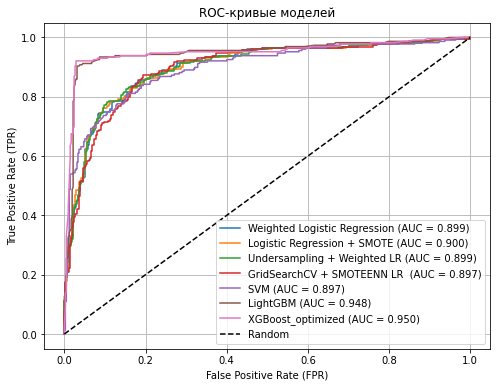

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

models = {
    "Weighted Logistic Regression": Weighted_Logistic_Regression,
    "Logistic Regression + SMOTE":  Logistic_Regression_SMOTE,
    "Undersampling + Weighted LR": Undersampling_Weighted_LR,
    "GridSearchCV + SMOTEENN LR ": GridSearchCV_SMOTEENN_LR ,
    "SVM":svm_model,
    "LightGBM":modelLightGBM_best,
    "XGBoost_optimized":optimized_XGBoost
    
   }

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Получаем вероятности положительного класса
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Если predict_proba отсутствует, используем decision_function
        y_proba = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

# Диагональ случайного классификатора
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.title("ROC-кривые моделей")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Добавим метрику PR_AUC так как нам также необходимо смотреть не только общее качество модели но и  максимизировать качество предсказаний для положительных случаев

In [71]:
import numpy as np
import pandas as pd

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, average_precision_score
)
from sklearn.exceptions import NotFittedError


def get_metrics(y_true, y_pred, y_proba, prefix=' '):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc = roc_auc_score(y_true, y_proba)
    pr_auc = average_precision_score(y_true, y_proba)

    try:
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    except ValueError:
        tn = fp = fn = tp = np.nan

    return {
        f'{prefix}Accuracy': acc,
        f'{prefix}Precision': prec,
        f'{prefix}Recall': rec,
        f'{prefix}F1': f1,
        f'{prefix}ROC-AUC': roc,
        f'{prefix}PR-AUC': pr_auc,
        f'{prefix}True Negative': tn,
        f'{prefix}False Positive': fp,
        f'{prefix}False Negative': fn,
        f'{prefix}True Positive': tp
    }


def compare_models(models, X_train, y_train, X_test, y_test,
                   threshold_models=None, optimal_threshold=0.5,
                   sort_by=None):
    
    results = []
    threshold_models = threshold_models or []

    for name, model in models.items():
        try:
            # Получаем вероятности
            y_train_proba = model.predict_proba(X_train)[:, 1]
            y_test_proba = model.predict_proba(X_test)[:, 1]

            # Применяем порог для указанных моделей
            if name in threshold_models and optimal_threshold is not None:
                y_train_pred = (y_train_proba >= optimal_threshold).astype(int)
                y_test_pred = (y_test_proba >= optimal_threshold).astype(int)
            else:
                y_train_pred = model.predict(X_train)
                y_test_pred = model.predict(X_test)

            # Считаем метрики
            train_metrics = get_metrics(y_train, y_train_pred, y_train_proba, prefix='')
            test_metrics = get_metrics(y_test, y_test_pred, y_test_proba, prefix='')

            # Формируем строку результата
            combined = {
                'Method': name,
                'ROC_AUC_Diff': train_metrics.get('ROC-AUC', np.nan) - test_metrics.get('ROC-AUC', np.nan),
                'PR_AUC_Diff': train_metrics.get('PR-AUC', np.nan) - test_metrics.get('PR-AUC', np.nan)
            }

            metrics_order = [
                'Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC', 'PR-AUC',
                'True Negative', 'False Positive', 'False Negative', 'True Positive'
            ]

            for metric in metrics_order:
                combined[f'Train_{metric}'] = train_metrics.get(metric, np.nan)
                combined[f'Test_{metric}'] = test_metrics.get(metric, np.nan)

            results.append(combined)

        except Exception as e:
            print(f"[Ошибка] {name}: {str(e)}")
            continue

    
    results_df = pd.DataFrame(results).set_index('Method')

    # Порядок столбцов
    ordered_columns = []
    for metric in metrics_order:
        ordered_columns.extend([f'Train_{metric}', f'Test_{metric}'])
    ordered_columns += ['ROC_AUC_Diff', 'PR_AUC_Diff']
    available_columns = [col for col in ordered_columns if col in results_df.columns]
    results_df = results_df[available_columns]


    if sort_by:
        ascending = [False if m in ['Test_Recall', 'Test_PR-AUC'] else True for m in sort_by]
        results_df = results_df.sort_values(by=sort_by, ascending=ascending)

    return results_df


models = {
    "Weighted Logistic Regression": Weighted_Logistic_Regression,
    "Logistic Regression + SMOTE": Logistic_Regression_SMOTE,
    "Undersampling + Weighted LR": Undersampling_Weighted_LR,
    "GridSearchCV + SMOTEENN LR": GridSearchCV_SMOTEENN_LR,
    "SVM": svm_model,
    "LightGBM_Best": modelLightGBM_best,
    "Optimized_XGBoost": optimized_XGBoost
}

results_df = compare_models(
    models=models,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    threshold_models=["LightGBM_Best"],
    optimal_threshold=optimal_threshold,
    sort_by=["Test_Recall", "Test_PR-AUC"]
)


pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', None)  # Не скрывать колонки по середине
pd.set_option('display.expand_frame_repr', False)  # Не переносить на новую строку
pd.set_option('display.width', None)  # Автоматическая ширина
print("Сравнение моделей с PR-AUC:")
display(results_df)

Сравнение моделей с PR-AUC:


,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1,Train_ROC-AUC,Test_ROC-AUC,Train_PR-AUC,Test_PR-AUC,Train_True Negative,Test_True Negative,Train_False Positive,Test_False Positive,Train_False Negative,Test_False Negative,Train_True Positive,Test_True Positive,ROC_AUC_Diff,PR_AUC_Diff
Method,,,,,,,,,,,,,,,,,,,,,,
Optimized_XGBoost,0.9568,0.9504,0.9499,0.9455,0.9267,0.9123,0.9382,0.9286,0.9627,0.9496,0.9525,0.9264,946,405,26,12,39,20,493,208,0.0131,0.0261
LightGBM_Best,0.9448,0.9457,0.9517,0.9406,0.8891,0.9035,0.9193,0.9217,0.9653,0.9483,0.9528,0.9201,948,404,24,13,59,22,473,206,0.0170,0.0327
GridSearchCV + SMOTEENN LR,0.8231,0.8078,0.7021,0.6757,0.8684,0.8772,0.7765,0.7634,0.9064,0.8965,0.8463,0.8340,776,321,196,96,70,28,462,200,0.0098,0.0124
Weighted Logistic Regression,0.8278,0.8233,0.7220,0.7065,0.8346,0.8553,0.7742,0.7738,0.9072,0.8995,0.8540,0.8431,801,336,171,81,88,33,444,195,0.0077,0.0109
Undersampling + Weighted LR,0.8245,0.8217,0.7182,0.7055,0.8289,0.8509,0.7696,0.7714,0.9064,0.8995,0.8554,0.8445,799,336,173,81,91,34,441,194,0.0070,0.0109
SVM,0.8078,0.8078,0.6932,0.6857,0.8195,0.8421,0.7511,0.7559,0.8909,0.8965,0.8468,0.8468,779,329,193,88,96,36,436,192,-0.0057,0.0000
Logistic Regression + SMOTE,0.8318,0.8171,0.7306,0.7007,0.8308,0.8421,0.7775,0.7649,0.9069,0.8996,0.8559,0.8460,809,335,163,82,90,36,442,192,0.0072,0.0099


### Лучшие результаты показал Optimized_XGBoost

Обладает очень высоким recall (0.9123) находит почти всех больных пациентов

Показывает наилучший F1-score (0.9286) баланс между точностью и полнотой
Лучший Test_PR-AUC 0.9264 лучше всего отделяет больных от здоровых

Имеет минимальное число FN (20) минимальный риск пропустить заболевание

PR AUC = 0.9264 лучшая из всех моделей по способности различать классы